# EDA on Facebook Data

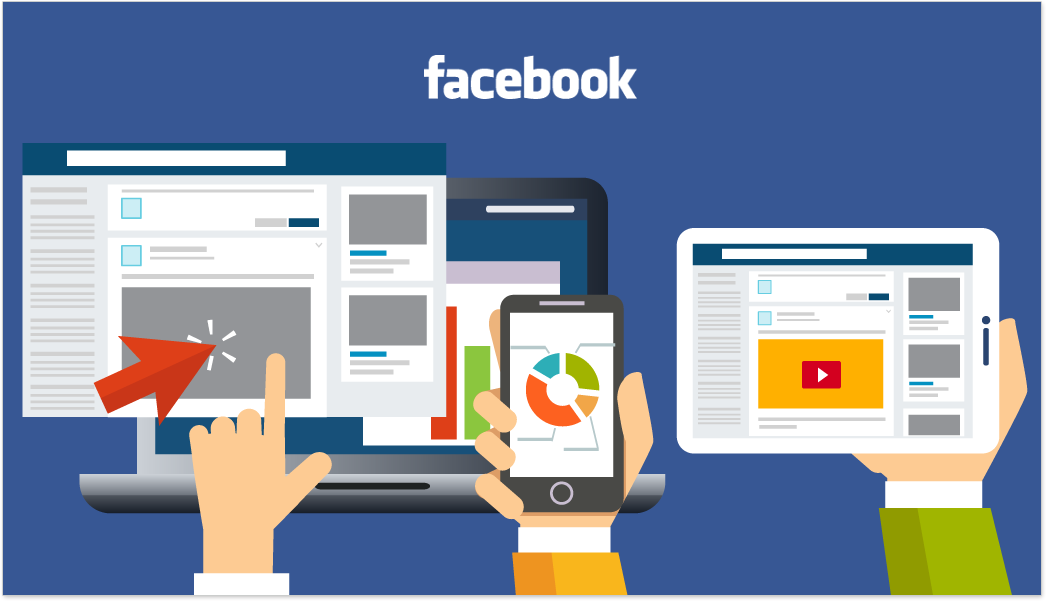

### Table of Contents

- 1. [Problem statement](#section1)<br>
- 2. [Importing Packages](#section2) <br>
- 3. [Loading Data](#section3)<br>
    - 3.1 [Description of the Dataset](#section301) <br>
- 4. [Pandas Profiling before Data processing](#section4) <br>
- 5. [Data Preprocessing](#section5) <br>
- 6. [Pandas Profiling after Data processing](#section6) <br>
- 7. [Exploratory Data Analysis](#section7) <br>
    - 7.1 [Individual Column Analysis](#section701) <br>
    - 7.2 [Analysis on the basis of gender](#section702) <br>
        - 7.2.1 [Which gender initiates more friendship requests and has more friend count?](#section70201) <br>
        - 7.2.2 [Which gender gives/receives more likes ?](#section70202) <br>
        - 7.2.3 [Which gender gives/receives more likes via mobile app ?](#section70203) <br>
        - 7.2.4 [Which gender gives/receives more likes via web ?](#section70204) <br>
        - 7.2.5 [Which gender uses which mode more for giving/receiving likes ?](#section70205) <br>
        - 7.2.6 [How many males and females are there in each age group ?](#section70206) <br>
        - 7.2.7 [What is the tenure of different gender on facebook ?](#section70207) <br>
        - 7.2.8 [Which gender has received highest no. of likes ?](#section70208) <br>
        - 7.2.9 [Which gender has received lowest no. of likes ?](#section70209) <br>
        - 7.2.10 [Overall Observations](#section702010) <br>
    - 7.3 [Analysis on the basis of Age](#section703) <br>
        - 7.3.1 [On an average which age group has the highest friend count and has highest friendship initiated ?](#section70301) <br>
        - 7.3.2 [On an average which age group gives and receives more likes ?](#section70302) <br>
        - 7.3.3 [On an average which age group gives and receives more likes via mobile ?](#section70303) <br>
        - 7.3.4 [On an average which age group gives and receives more likes via web ?](#section70304) <br>
        - 7.3.5 [Which age group uses which mode for giving likes ?](#section70305) <br>
        - 7.3.6 [Which age group gets more likes via which mode ?](#section70306) <br>
        - 7.3.7 [Which age group has been on facebook the longest ?](#section70307) <br>
    - 7.4 [Analysis on the basis of Tenure](#section704) <br>
        - 7.4.1 [Observations](#section70401) <br>
    - 7.5 [Analysis on the basis of Gender and Age combined](#section705) <br>
        - 7.5.1 [Observations](#section70501) <br>
    - 7.6 [Analysis on the basis of Gender and Tenure combined](#section706) <br>
        - 7.6.1 [Observations](#section70601) <br>
    - 7.7 [Analysis on Dormant users](#section707) <br>
        - 7.7.1 [Users with 0 Friend count and 0 Friendships initiated](#section70701) <br>
        - 7.7.2 [Users who are completely dormant with no activity whatsoever](#section70702) <br>
        - 7.7.3 [Users with friends but no likes activity at all](#section70703) <br>
        - 7.7.4 [Users who do not use web at all](#section70704) <br>
        - 7.7.5 [Users who do not use mobile at all](#section70705) <br> 
    - 7.8 [Overall usage of mobile app and web](#section708) <br>
- 8. [Conclusion](#section8) <br>
- 9. [Actionable Insights](#section9) <br>

<a id=section1></a> 
## 1. Problem statement

Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their 
status,thoughts and pictures with their friends. With the mobile app, it has become even more popular and easier to access. 
People from all age groups are connected to facebook, however **there are certain differences in their way of using it such as 
with respect to initiating friendships and sending likes** . We are trying to study the dataset provided to **identify certain 
patterns with respect to how the users are making use of this most popular social networking app depending on their 
age group,gender etc.**

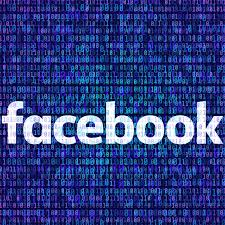

<a id=section2></a>
## 2. Importing Packages

In [6]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                           # This is to suppress all the warnings in the notebook.

pd.set_option('display.max_columns',100)

# Installing panda preprofiling
# !pip install pandas_profiling ==1.4.1 

<a id=section3></a>
## 3. Loading Data

In [7]:
facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<a id=section301></a>
### 3.1 Description of the Dataset

This dataset provides a usage analysis of various facebook users such as the tenure of their account, number of friends they 
have, number of friendships they have initiated, the number of likes received by them through the FB website and through 
the mobile app .

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| userid                         | A numeric value uniquely identifying the user                                              | 
| age                            | Age of the user in years                                                                   | 
| dob_day                        | Day part of the user's date of birth                                                       |
| dob_year                       | Year part of the user's date of birth                                                      |
| dob_month                      | Month part of the user's date of birth                                                     |
| gender                         | Gender of the user                                                                         |
| tenure                         | Number of days since the user has been on FB                                               |
| friend_count                   | Number of friends the user has                                                             |
| friendships_initiated          | Number of friendships initiated by the user                                                |
| likes                          | Total number of posts liked by the user                                                    |
| likes_received                 | Total Number of likes received by user's posts                                             |
| mobile_likes                   | Number of posts liked by the user through mobile app                                       |
| mobile_likes_received          | Number of likes received by user through mobile app                                        |
| www_likes                      | Number of posts liked by the user through web                                              |
| www_likes_received             | Number of likes received by user through web                                               |

In [3]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

- **Info** function gives us the following insights into the facebook dataframe-
    1. There are a total of **99003 rows** and **15 columns** in the dataframe.
    2. There is **1 column (Gender)** with an **object datatype**, **1 column (Tenure)** with **float datatype** and rest **13 columns** with **numeric datatype**.
    3. **Gender** has **175 missing values**. 
    4. **Tenure** has **2 missing values**.

In [4]:
facebook_df.describe(include="all")                              

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


- **Describe** function gives us the following insights into the facebook dataframe-

    1. **Age** - Minimum age is absolutely okay as it meets the facebook eligibility criteria but if we look at the **maximum age**, it is too high to be real as it is **113**. We need to dig deeper in this regard and check the dob_year to first analyse if the age provided in the data is correct or not. Secondly, we need to understand if this is the case with few users only 
or this is not unusual and there are good number of users or outliers in that range.
    2. **Dob_year** - **Minimum year** given is **1900**. Looking at this, it seems like there were some missing values which has taken form of 1900.
    3. **Tenure** - There are **2 missing values** in this column as the count is 99001 instead of 99003.
    4. **Gender** - There are **175 missing values** in this column as the count is 98828 instead of 99003. 
**Male users and female users** are in **60:40** ratio. Hence there are **more male users than female users**.
    5. **Likes given** - **More Likes** are **given via mobile app than web**.
    6. **Likes received** - We can see the max in this category is huge which means probably some users have their accounts public. Again **more likes** are **received on mobile app than web**.
    7. **Total Likes given** are **less** than **total likes received**.

<a id=section4></a>
## 4. Pandas Profiling before Data processing

Here we will perform Pandas Profiling on our dataset before Data processing and will name the output file as 
facebook_df_pre_profiling_report.html. The file will get stored in the directory of our notebook. 

In [6]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(facebook_df)

In [7]:
profile.to_file('facebook_df_pre_profiling_report.html')

**Observations from Pandas profiling before Data processing**

- **Dataset info:**

    - Number of variables: 15
    - Number of observations: 99003
    - Missing cells: 177 (<0.1%)


- **Variables types:**

    - Numeric = 14
    - Categorical = 1
    
    
- **Userid** - The Ids are **all unique**. There are **no duplicates** in the userbase.
- **Age** - As observed earlier, the **maximum age** in the dataset is **113** which is quite unusual. We can see that the numbers of users fade with the increase in age but at the same time we can also see a sudden spike in the userbase after age 92. We can't fully term this as incorrect data as there must be for sure few users **above the age 92** but **4000 people** above this age is leading to **outliers**. **Maximum userbase is** within the **age group 18-25**.
- **Dob_day** - This is well within the correct **range of 1-31** with **no missing values**.
- **Dob_year** - Here the minimum year value of 1900 is absurd. This looks like the missing year. This also explains the extreme age range of the users also. Apart from this, **maximum userbase is 1990-1995 born**.
- **Dob_month** - This is also within the correct **range of 1-12** with **no missing values**.
- **Gender** - As observed earlier, there are **175 missing values**. **Male users** are around **60%** of the entire data. Since male users are more than the female users, we can **assign male gender to all the missing values**. Ideally we should allot gender in the missing fields basis 60:40 ratio but again assigning which gender to whom would be a big challenge as we have zero information in this regard. Hence assigning everyone with male gender. Plus assigning male gender to 175 users won't affect our analysis much as we are using this assumption on a very small number as compared to the entire data of 99003.
- **Tenure** - Again as observed earlier, there are **2 missing values**. We can observe that **mean > median**. This means our tenure is **rightly skewed**. Hence assigning the missing values with mean won't do any good as it is affected by outliers. Hence, we'll be **assigning mode** of the tenure which is **300 days to our missing values**.
- **Friend count** - **Most of the users** have **0-2 facebook friends**. But at the same time, the friend count **can even go high as 4923 friends**. 
- **Friendships initiated** - Similar to friend count, **most of the users** have initiated friendships in the range of **0-10**, 0 being the highest. At the same time, there is **1 user** who has **initiated 4144 friendship requests**.
- **Likes** - Likes given can be as high as giving more than 25000 likes and as low as giving 0 likes. But **most of the users** are those who have **given 0 likes**.
- **Likes received** - Like the previous column, like received can be as **high as receiving more than 0.2 million likes** and as low as receiving 0 likes. But **most of the users** are those who have **received 0-1 likes**. Since **mean (value = 142)** is far far away from the **median (value = 8)**, we can conclude that this category is **highly positively skewed**.
- **Mobile likes** - **34.7%** of the user base has **given 0 likes** and only **less than 0.1%** has **given more than 25000 likes**. Range for mobile likes is 0-25111.
- **Mobile likes received** - **30.3%** of the user base has **received 0 likes** and only **less than 0.1%** has **received more than 0.1 million likes**. Similar to likes received, this category is also **highly positively skewed**. 
- **WWW likes** - **61.6%** of the user base has **given 0 likes through web** and only **less than 0.1%** has **given more than 14000 likes** through web. Comparing mobile likes and web likes, we observe that **people use mobile app more than web for giving likes**.
- **WWW likes received** - **37.2%** of the user base has **received 0 likes** through web and only **less than 0.1%** has **received more than 0.1 million web likes**. Similar to likes received and mobile likes received, this category also is **highly positively skewed**.


- **Correlation:**

    - There is **good degree** of correlation between **age and tenure**. Higher the age, higher the user has been on facebook.
    - There is **high degree** of correlation between **friendship initiated and friendship count**. More the friendship initiated, more friends you have on facebook.

<a id=section5> </a>
## 5. Data Preprocessing
Here we will process our dataset to make it more usable for EDA.

- **Gender has 175 missing values. Hence fixing them and categorizing them into various groups.**

In [8]:
facebook_df['gender'].unique()

array(['male', 'female', nan], dtype=object)

In [9]:
facebook_df['gender'].value_counts(dropna=False)                                      

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [10]:
# Filling missing values in gender column with mode

facebook_df['gender']= facebook_df['gender'].fillna(facebook_df['gender'].mode()[0])
facebook_df['gender'].value_counts(dropna=False)

male      58749
female    40254
Name: gender, dtype: int64

- **Categorizing the age into various age groups.**

In [11]:
#Dividing the age into group of 10 

labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook_df['age_group'] = pd.cut(facebook_df.age, bins = np.arange(10,121,10), labels=labels, right = True)
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [12]:
facebook_df['age_group'].value_counts()             

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
Name: age_group, dtype: int64

In [13]:
facebook_df['age_group'].sort_values()

0          10-20
35339      10-20
51591      10-20
76276      10-20
76277      10-20
          ...   
91130    111-120
78064    111-120
88969    111-120
26794    111-120
93867    111-120
Name: age_group, Length: 99003, dtype: category
Categories (11, object): ['10-20' < '21-30' < '31-40' < '41-50' ... '81-90' < '91-100' < '101-110' < '111-120']

- **Tenure has 2 missing values. Hence fixing them and labeling them into various groups.**

In [14]:
facebook_df['tenure'].interpolate(inplace=True)

In [15]:
tenure_group = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
facebook_df['tenure_group'] = pd.cut(facebook_df.tenure, bins=np.arange(0,3300,365), labels=tenure_group, right=True)
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year


In [16]:
facebook_df['tenure_group'].unique()

['0-1 year', NaN, '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6-7 years', '7-8 years', '8-9 years']
Categories (9, object): ['0-1 year' < '1-2 years' < '2-3 years' < '3-4 years' ... '5-6 years' < '6-7 years' < '7-8 years' < '8-9 years']

In [17]:
facebook_df['tenure_group'].fillna(value = '0-1 year', inplace = True)
facebook_df['tenure_group'].unique()

['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6-7 years', '7-8 years', '8-9 years']
Categories (9, object): ['0-1 year' < '1-2 years' < '2-3 years' < '3-4 years' ... '5-6 years' < '6-7 years' < '7-8 years' < '8-9 years']

In [18]:
facebook_df['tenure_group'].value_counts()

0-1 year     43659
1-2 years    33366
2-3 years     9861
3-4 years     5448
4-5 years     4557
5-6 years     1507
6-7 years      581
7-8 years       15
8-9 years        9
Name: tenure_group, dtype: int64

In [19]:
facebook_df.describe(include = "all")

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99003,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003,99003
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,9
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30,0-1 year
freq,NaN,NaN,NaN,NaN,NaN,58749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28646,43659
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887998,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831,NaN,NaN
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.647376,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348,NaN,NaN
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000,NaN,NaN
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000,NaN,NaN


<a id=section6> </a>
## 6. Pandas Profiling after Data processing

Here we will perform Pandas Profiling on our dataset after we have fixed the data and will name the output file as 
facebook_dfc_post_profiling_report.html. The file will get stored in the directory of our notebook. 

In [20]:
facebook_dfc = facebook_df.copy(deep = True)                 # Creating a copy of the original dataset

In [19]:
profile = pandas_profiling.ProfileReport(facebook_dfc)
profile.to_file('facebook_dfc_post_profiling_report.html')

NameError: name 'pandas_profiling' is not defined

**Observations from Pandas profiling after Data processing**

- **Dataset info:**

    - Number of variables: 17
    - Number of observations: 99003
    - Missing cells: 0


- **Variables types:**

    - Numeric = 14
    - Categorical = 3
    
    
- **Gender** - There are **no missing values** now. **Male users** are around **60%** of the entire data.
- **Tenure** - There are **no missing values** now. **Mean > median**. This means our tenure is **rightly skewed**.

<a id=section7> </a>
## 7. Exploratory Data Analysis

<a id=section701></a>
### 7.1 Individual column analysis

Text(0.5, 1.0, 'Gender percentage')

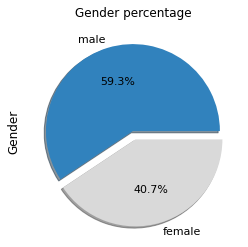

In [24]:
facebook_dfc['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, fontsize = 11, 
                                               cmap = 'tab20c')
plt.ylabel('Gender', fontsize = 12)
plt.title('Gender percentage', fontsize = 12)

Text(0.5, 1.0, 'User count on the basis of different age group')

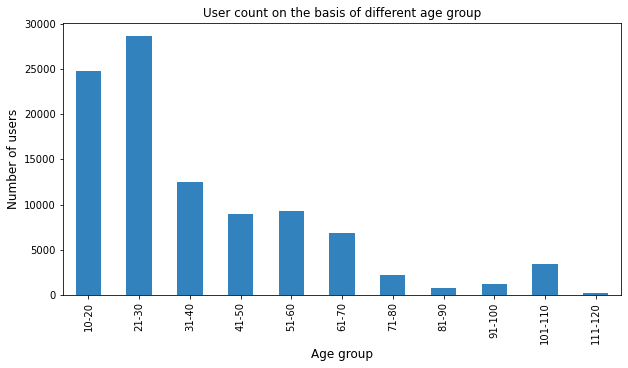

In [25]:
facebook_dfc.groupby(['age_group'])['age_group'].count().plot(kind ='bar', figsize = (10,5), cmap = 'tab20c')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('User count on the basis of different age group', fontsize = 12)

Text(0.5, 1.0, 'User count on the basis of different tenure')

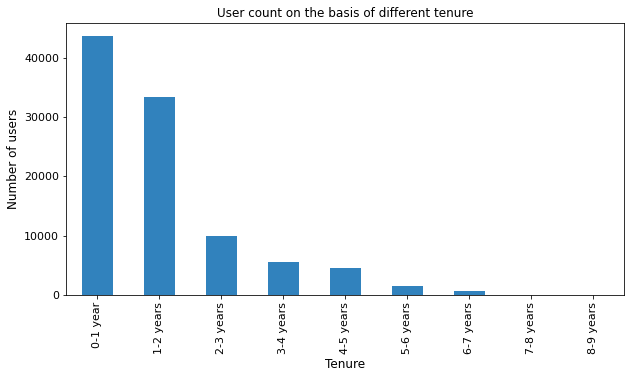

In [26]:
facebook_dfc['tenure_group'].value_counts().plot(kind ='bar',figsize = (10,5), fontsize = 11, cmap = 'tab20c')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('User count on the basis of different tenure', fontsize = 12)

Text(0.5, 1.0, 'Friend count vs Number of users')

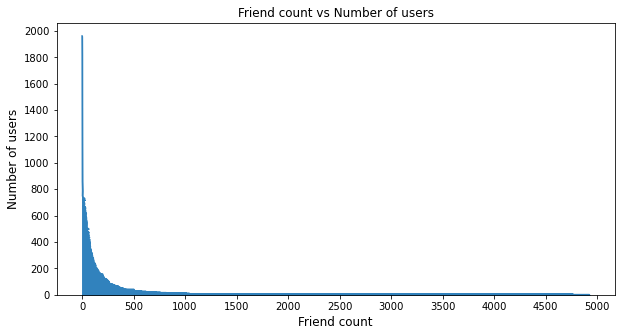

In [27]:
facebook_dfc['friend_count'].value_counts().plot(kind ='area', figsize = (10,5),xticks= np.arange(0,5001,500),
                                                 yticks=np.arange(0,2002,200), cmap = 'tab20c')
plt.xlabel('Friend count', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Friend count vs Number of users', fontsize = 12) 

Text(0.5, 1.0, 'Friendships initiated vs Number of users')

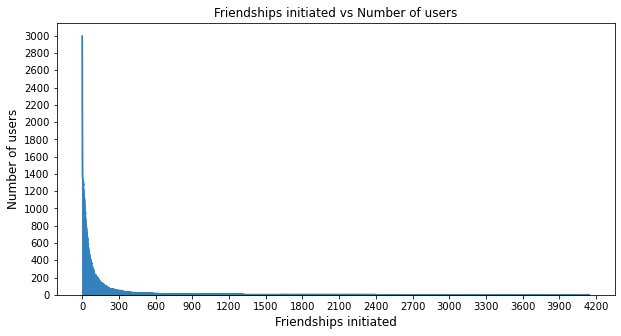

In [28]:
facebook_dfc['friendships_initiated'].value_counts().plot(kind ='area',figsize = (10,5),xticks= np.arange(0,4201,300), 
                                                          yticks=np.arange(0,3002,200), cmap = 'tab20c')
plt.xlabel('Friendships initiated', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Friendships initiated vs Number of users', fontsize = 12) 

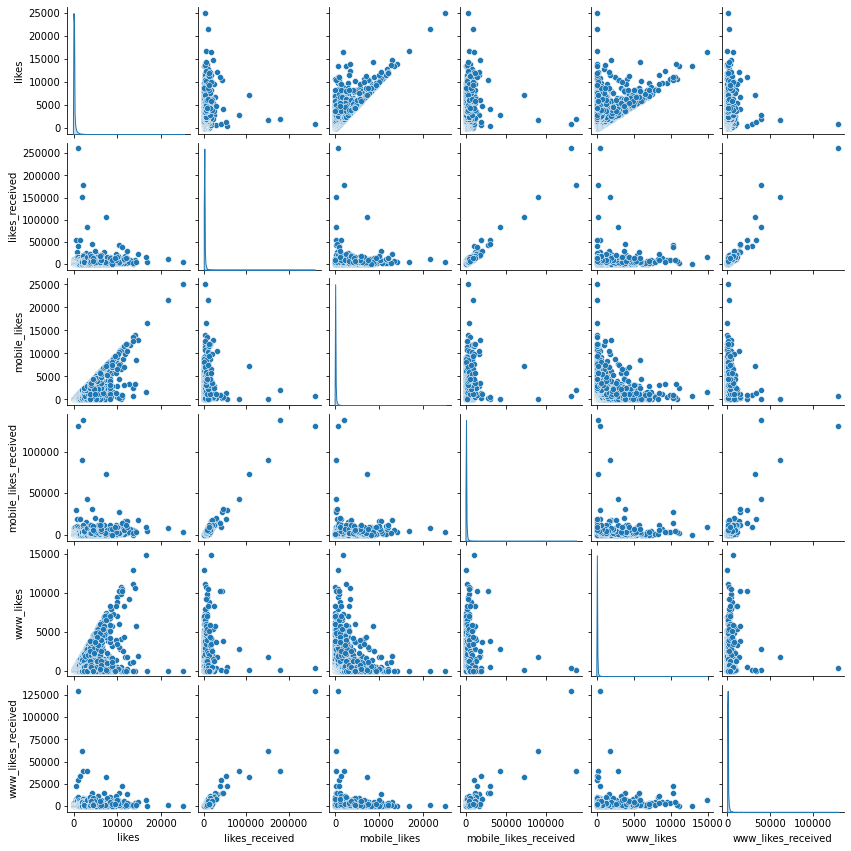

In [29]:
sns.pairplot(data=facebook_dfc[['likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 
                                'www_likes_received']], size=2, diag_kind='kde',palette='tab20c')

<AxesSubplot:>

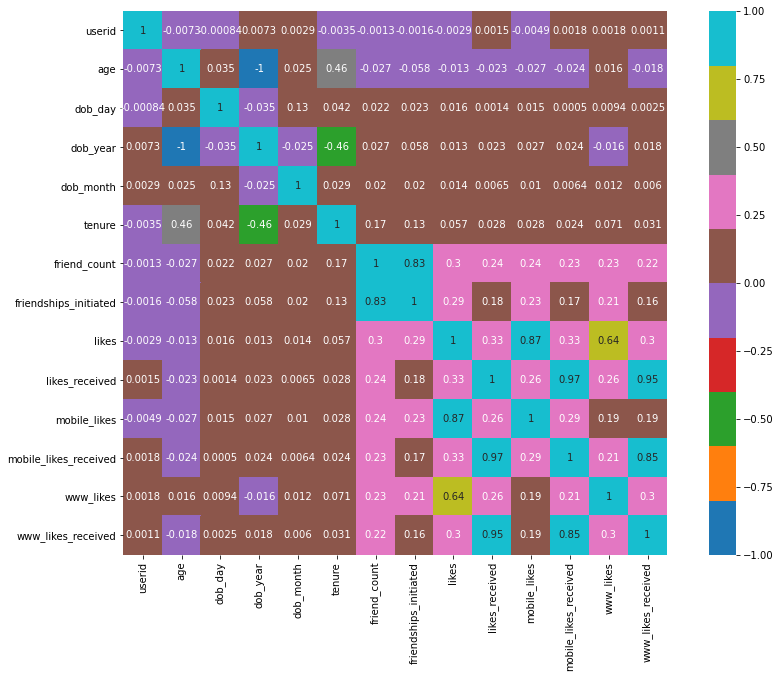

In [25]:
corr = facebook_dfc.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'tab10',vmax= 1, square=True, annot = True)

<a id=section702></a>
### 7.2 Analysis on the basis of gender

<a id=section70201></a>
**7.2.1 Which gender initiates more friendship requests and has more friend count ?** <br>
Ans - Inspite of males generating more friendship requests than females, both males and females have almost the same total friend count at the end.

Text(0.5, 1.0, 'Gender vs friendships initiated')

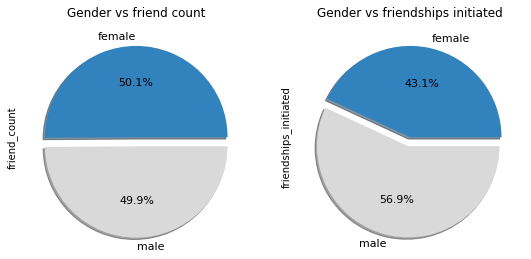

In [30]:
f,ax = plt.subplots(1,2, figsize= (9,6))
facebook_dfc.groupby(['gender'])['friend_count'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                shadow=True, cmap = 'tab20c', ax=ax[0])
facebook_dfc.groupby(['gender'])['friendships_initiated'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                         shadow=True, cmap = 'tab20c',ax=ax[1])

ax[0].set_title('Gender vs friend count', fontsize = 12)
ax[1].set_title('Gender vs friendships initiated', fontsize = 12)

<a id=section70202></a>
**7.2.2 Which gender gives/receives more likes ?** <br>
Ans - If we talk about the total number of likes given or received no matter what mode they use, whether it is mobile or web, then females are far ahead than males on this. They give and receive more likes than males. 

Text(0.5, 1.0, 'Gender vs total likes received')

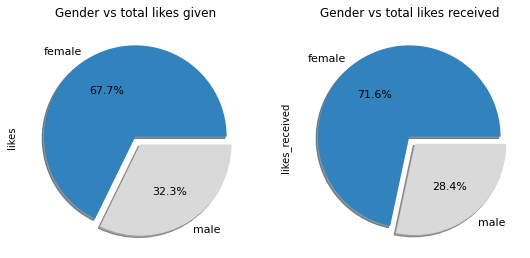

In [31]:
f,ax = plt.subplots(1,2, figsize= (9,6))
facebook_dfc.groupby(['gender'])['likes'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                         shadow=True, cmap = 'tab20c', ax=ax[0])
facebook_dfc.groupby(['gender'])['likes_received'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                  shadow=True, cmap = 'tab20c', ax=ax[1])

ax[0].set_title('Gender vs total likes given', fontsize = 12)
ax[1].set_title('Gender vs total likes received', fontsize = 12)

<a id=section70203></a>
**7.2.3 Which gender gives/receives more likes via mobile app ?** <br>
Ans - In this scenario also, females use facebook mobile app more than males for giving and receiving likes.

Text(0.5, 1.0, 'Gender vs likes received via mobile')

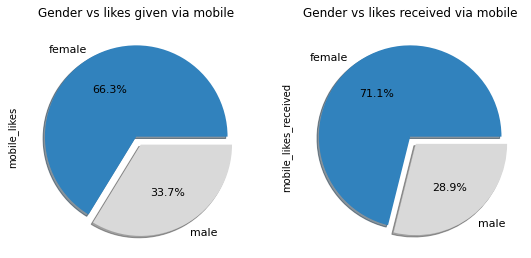

In [32]:
f,ax = plt.subplots(1,2, figsize= (9,6))
facebook_dfc.groupby(['gender'])['mobile_likes'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                shadow=True, cmap = 'tab20c', ax=ax[0])
facebook_dfc.groupby(['gender'])['mobile_likes_received'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                         shadow=True, cmap = 'tab20c',ax=ax[1])
ax[0].set_title('Gender vs likes given via mobile', fontsize = 12)
ax[1].set_title('Gender vs likes received via mobile', fontsize = 12)

<a id=section70204></a>
**7.2.4 Which gender gives/receives more likes via web ?** <br>
Ans - In this scenario also, females use facebook web more than males for giving or receiving likes.

Text(0.5, 1.0, 'Gender vs likes received via web')

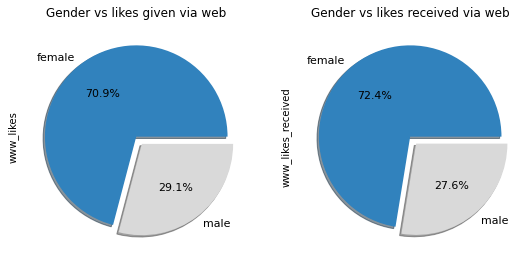

In [33]:
f,ax=plt.subplots(1,2,figsize=(9,6))
facebook_dfc.groupby(['gender'])['www_likes'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                             shadow=True, cmap = 'tab20c',ax=ax[0])
facebook_dfc.groupby(['gender'])['www_likes_received'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                      shadow=True, cmap = 'tab20c', ax=ax[1])
ax[0].set_title('Gender vs likes given via web', fontsize = 12)
ax[1].set_title('Gender vs likes received via web', fontsize = 12)

<a id=section70205></a>
**7.2.5 Which gender uses which mode more for giving/receiving likes ?** <br>
Ans - Females are more inclined towards using web whereas males are more inclined towards using mobile app for their social networking activities on facebook.

Text(0.5, 1.0, 'Gender vs likes given via web')

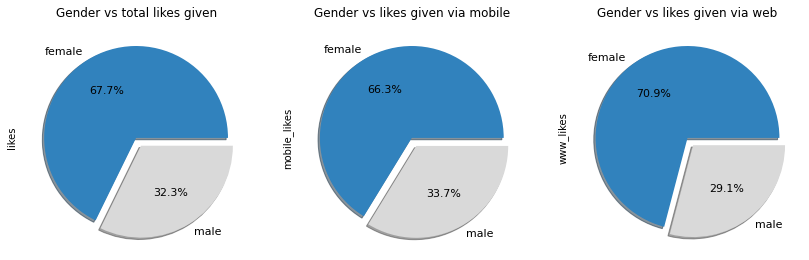

In [34]:
f,ax = plt.subplots(1,3, figsize= (14,6))
facebook_dfc.groupby(['gender'])['likes'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                         shadow=True, cmap = 'tab20c', ax=ax[0])
facebook_dfc.groupby(['gender'])['mobile_likes'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                shadow=True, cmap = 'tab20c', ax=ax[1])
facebook_dfc.groupby(['gender'])['www_likes'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                             shadow=True, cmap = 'tab20c',ax=ax[2])
ax[0].set_title('Gender vs total likes given', fontsize = 12)
ax[1].set_title('Gender vs likes given via mobile', fontsize = 12)
ax[2].set_title('Gender vs likes given via web', fontsize = 12)

Text(0.5, 1.0, 'Gender vs likes received via web')

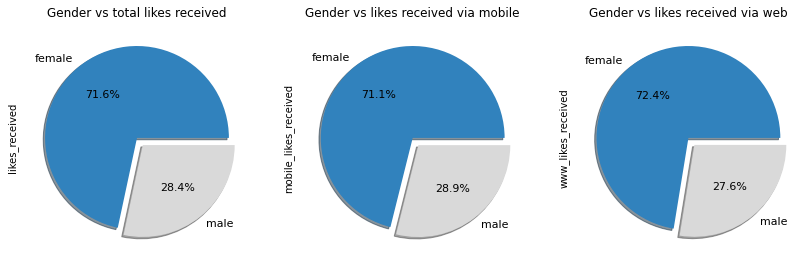

In [35]:
f,ax = plt.subplots(1,3,figsize= (14,6))
facebook_dfc.groupby(['gender'])['likes_received'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                  shadow=True, cmap = 'tab20c', ax=ax[0])
facebook_dfc.groupby(['gender'])['mobile_likes_received'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                         shadow=True, cmap = 'tab20c',ax=ax[1])
facebook_dfc.groupby(['gender'])['www_likes_received'].sum().plot.pie(fontsize = 11, explode=[0,0.1],autopct='%1.1f%%', 
                                                                      shadow=True, cmap = 'tab20c', ax=ax[2])
ax[0].set_title('Gender vs total likes received', fontsize = 12)
ax[1].set_title('Gender vs likes received via mobile', fontsize = 12)
ax[2].set_title('Gender vs likes received via web', fontsize = 12)

<a id=section70206></a>
**7.2.6 How many males and females are there in each age group ?** <br>

In [36]:
facebook_dfc.groupby(['age_group'])['gender'].value_counts()

age_group  gender
10-20      male      15049
           female     9703
21-30      male      18840
           female     9806
31-40      male       7803
           female     4688
41-50      male       5037
           female     3931
51-60      female     4921
           male       4398
61-70      female     3659
           male       3196
71-80      female     1229
           male       1020
81-90      male        432
           female      385
91-100     male        722
           female      497
101-110    male       2131
           female     1318
111-120    male        121
           female      117
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender vs Age Group')

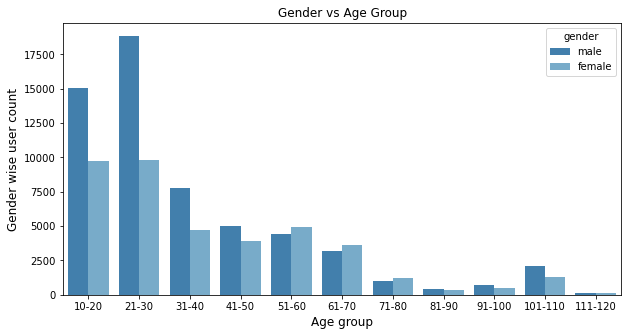

In [37]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(data = facebook_dfc, x ='age_group', hue='gender',palette='tab20c')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Gender wise user count', fontsize = 12)
plt.title('Gender vs Age Group',fontsize = 12)

<a id=section70207></a>
**7.2.7 What is the tenure of different gender on facebook ?**

In [38]:
facebook_dfc.groupby(['tenure_group'])['gender'].value_counts()

tenure_group  gender
0-1 year      male      27299
              female    16360
1-2 years     male      19743
              female    13623
2-3 years     male       5742
              female     4119
3-4 years     male       2927
              female     2521
4-5 years     female     2478
              male       2079
5-6 years     female      823
              male        684
6-7 years     female      314
              male        267
7-8 years     female       10
              male          5
8-9 years     female        6
              male          3
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender vs Tenure Group')

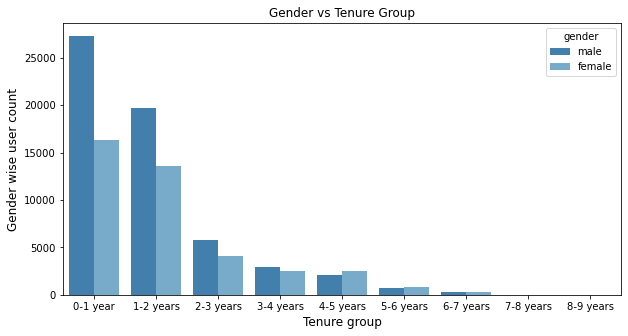

In [39]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data = facebook_dfc, x ='tenure_group', hue='gender', palette='tab20c')
plt.xlabel('Tenure group', fontsize = 12)
plt.ylabel('Gender wise user count', fontsize = 12)
plt.title('Gender vs Tenure Group',fontsize = 12)

<a id=section70208></a>
**7.2.8 Which gender has received highest no. of likes ?** <br>
Ans - If we look at the top 10 users who have received maximum likes, then 60% of them are female.

In [40]:
facebook_dfc.sort_values(by='likes_received', ascending = False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,10-20,0-1 year
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years


<a id=section70209></a>
**7.2.9 Which gender has received lowest no. of likes ?** <br>
Ans - Again, if we look at the top 10 users who have received lowest likes, then 70% of them are male.

In [41]:
facebook_dfc.sort_values(by='likes_received', ascending = True)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
30290,1531452,51,4,1962,11,male,649.0,40,18,0,0,0,0,0,0,51-60,1-2 years
30289,1196580,49,12,1964,6,male,1338.0,40,18,0,0,0,0,0,0,41-50,3-4 years
30288,1922656,49,12,1964,2,female,312.0,40,29,0,0,0,0,0,0,41-50,0-1 year
30287,1667329,48,16,1965,8,male,243.0,40,29,0,0,0,0,0,0,41-50,0-1 year
30286,1043383,47,18,1966,9,female,123.0,41,22,0,0,0,0,0,0,41-50,0-1 year
30283,1461645,44,20,1969,1,male,451.0,40,14,0,0,0,0,0,0,41-50,1-2 years
30282,1168163,45,21,1968,11,male,91.0,41,36,0,0,0,0,0,0,41-50,0-1 year
30281,1732752,45,17,1968,11,male,1014.0,40,26,0,0,0,0,0,0,41-50,2-3 years
30280,1583662,43,20,1970,5,female,210.0,40,25,0,0,0,0,0,0,41-50,0-1 year


<a id=section702010></a>
**7.2.10 Overall Observations**
- Friend count of males and females are almost the same. Friend count doesn't really vary on the basis of gender.
- Males initiate more friendship requests than females by 14%.
- Females give more likes and receive more likes than males by 35% and 43% respectively.
- Females give more likes and receive more likes via mobile than males by 32% and 42% respectively.
- Females give more likes and receive more likes via web than males by 42% and 45% respectively.
- Females use web more than mobile by 5% to give likes.
- Males on the other hand use mobile more than web by 5% to give likes.
- Females get more likes via web than mobile by 1% whereas males get more likes via mobile than web by the same %.
- Age group 21-30 has maximum number of males and females. As the age increases, the total numbers of users in each age group decreases. Till the age of 50, male users are more than the female users. But between age 50-90, female users are more than the male users.
- After joining facebook, for first 4 years, males are very active in using facebook. But after 4 years, as their tenure on facebook increases, they become less interested. This is not the case with females. Females remain active on facebook even after 4 years and infact after 4 years, they are using facebook more than the males. Hence, we can conclude that males remain active on facebook only for a short duration of time. In the long term, females remain more active on facebook than males.
- If we look at the top 10 users who have received maximum likes, then 60% of them are female.
- If we look at the top 10 users who have received lowest likes, then 70% of them are male.

<a id=section703></a>
### 7.3 Analysis on the basis of Age

<a id=section70301></a>
**7.3.1 On an average which age group has the highest friend count and has highest friendship initiated ?** <br>
Ans - On an average, Between age 10-20, we can see maximum activity in terms of initiating friend request and in terms of total friend count. As the age increases, this particular activity decreases.

In [42]:
facebook_dfc.groupby(['age_group'])['friend_count', 'friendships_initiated'].mean()

,friend_count,friendships_initiated
age_group,,
10-20,321.773109,172.228224
21-30,168.868708,99.957202
31-40,106.185253,62.526299
41-50,104.987846,59.129126
51-60,108.618092,59.920592
61-70,134.019840,69.158133
71-80,125.646954,59.459760
81-90,279.952264,129.337821
91-100,377.880230,181.087777


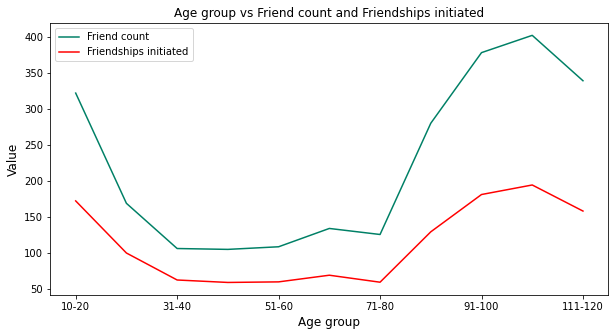

In [34]:
facebook_dfc.groupby(['age_group'])['friend_count'].mean().plot(kind='line',figsize = (10,5), cmap='summer')
facebook_dfc.groupby(['age_group'])['friendships_initiated'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Age group vs Friend count and Friendships initiated', fontsize = 12)
plt.legend(['Friend count', 'Friendships initiated'])

<a id=section70302></a>
**7.3.2 On an average which age group gives and receives more likes ?** <br>
Ans - On an average, Between age 10-20, we can see maximum activity in terms of giving/receiving likes. The younger age group initially receives more likes than giving likes but as the age of the user increases, they receive less likes than before.

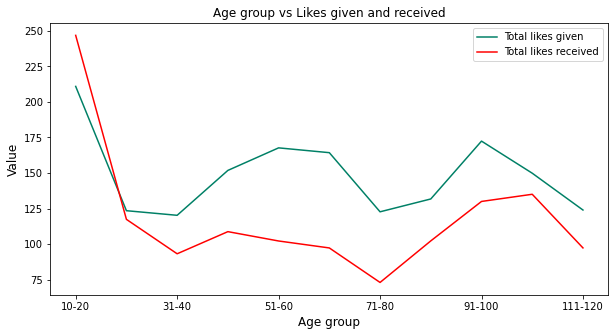

In [36]:
facebook_dfc.groupby(['age_group'])['likes'].mean().plot(kind='line', figsize = (10,5),cmap ='summer')
facebook_dfc.groupby(['age_group'])['likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Age group vs Likes given and received', fontsize = 12)
plt.legend(['Total likes given', 'Total likes received'])

<a id=section70303></a>
**7.3.3 On an average which age group gives and receives more likes via mobile ?** <br>
Ans - On an average, users between the age group 10-20 receive more likes via mobile than they give. But as the age increases, we can see that the users give more likes than what they recieve.

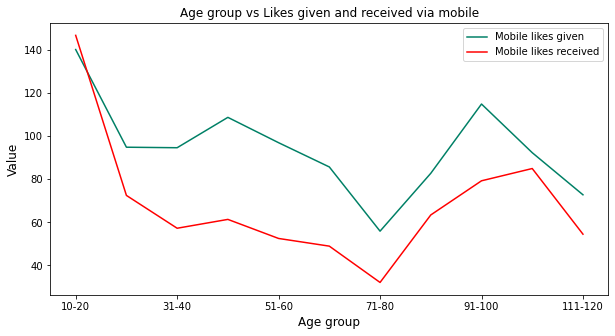

In [43]:
facebook_dfc.groupby(['age_group'])['mobile_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['age_group'])['mobile_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Age group vs Likes given and received via mobile', fontsize = 12)
plt.legend(['Mobile likes given', 'Mobile likes received'])

<a id=section70304></a>
**7.3.4 On an average which age group gives and receives more likes via web ?** <br>
Ans - When it comes to using web for giving/receiving likes, we can see that users till the age 50 receive more likes than what they give. But after the age 50, it is vice versa. Users after the age 50, give more likes via web and receive less.

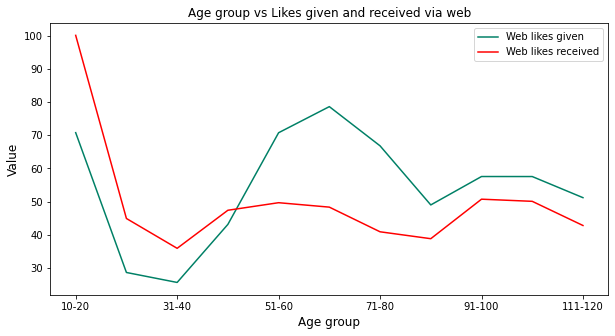

In [44]:
facebook_dfc.groupby(['age_group'])['www_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['age_group'])['www_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Age group vs Likes given and received via web', fontsize = 12)
plt.legend(['Web likes given', 'Web likes received'])

<a id=section70305></a>
**7.3.5 Which age group uses which mode for giving likes ?** <br>
Ans -  We can easily observe here that users within the age group 10-70 use mobile more than web for giving likes. High age group users are more comfortable with using web for giving likes.

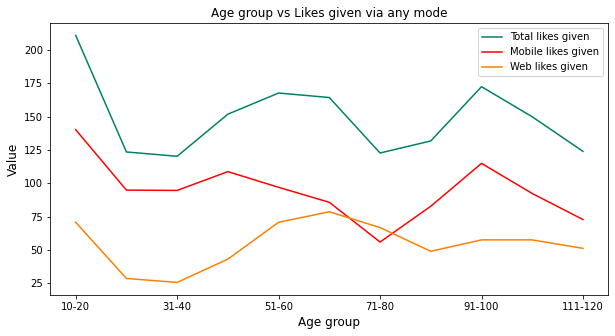

In [45]:
facebook_dfc.groupby(['age_group'])['likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['age_group'])['mobile_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
facebook_dfc.groupby(['age_group'])['www_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='Wistia_r')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Age group vs Likes given via any mode', fontsize = 12)
plt.legend(['Total likes given', 'Mobile likes given', 'Web likes given'])

<a id=section70306></a>
**7.3.6 Which age group gets more likes via which mode ?** <br>
Ans - Here also we can easily observe that users within the age group 10-60 get more likes via mobile than web. There is a slight intersection at the age 70, where there is no difference between the mode used. Here users are getting equal number of likes via any mode. It's just between age 70-80, where users are getting more likes via web. Again after age 80, we can see a spike in the like received via mobile app.

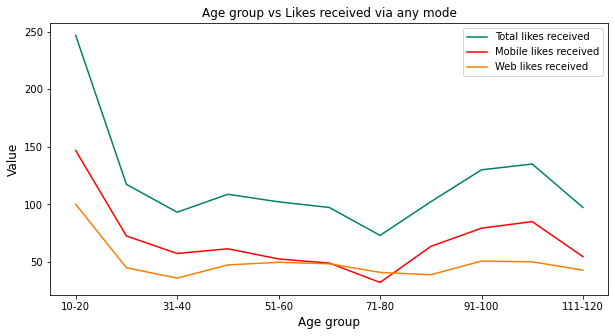

In [40]:
facebook_dfc.groupby(['age_group'])['likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['age_group'])['mobile_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
facebook_dfc.groupby(['age_group'])['www_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='Wistia_r')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Age group vs Likes received via any mode', fontsize = 12)
plt.legend(['Total likes received', 'Mobile likes received', 'Web likes received'])

<a id=section70307></a>
**7.3.7 Which age group has been on facebook the longest ?** <br>
Ans - We can see that Age and tenure has positive correlation. As the age increases, your tenure on facebook also increases.

Text(0.5, 1.0, 'Age group vs Tenure')

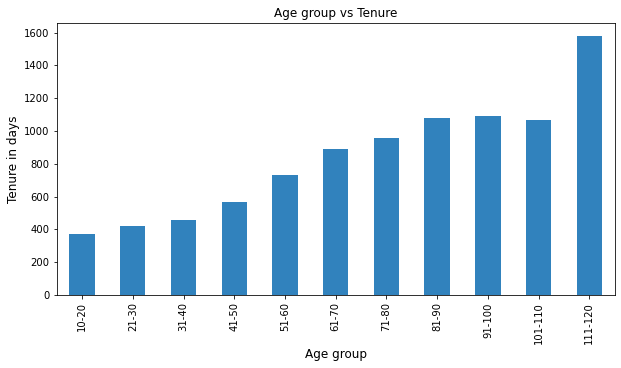

In [46]:
facebook_dfc.groupby(['age_group'])['tenure'].mean().plot(kind='bar', figsize = (10,5), cmap ='tab20c')
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Tenure in days', fontsize = 12)
plt.title('Age group vs Tenure', fontsize = 12)

<a id=section704></a>
### 7.4 Analysis on the basis of Tenure

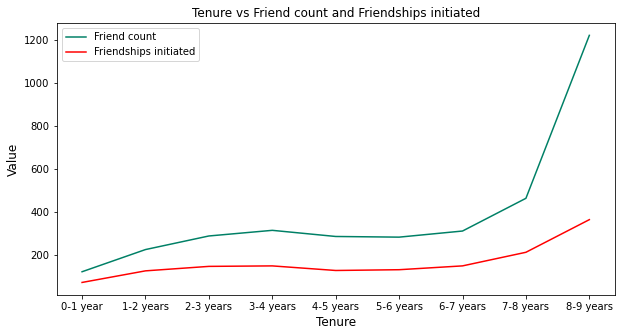

In [46]:
facebook_dfc.groupby(['tenure_group'])['friend_count'].mean().plot(kind='line',figsize = (10,5), cmap='summer')
facebook_dfc.groupby(['tenure_group'])['friendships_initiated'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Tenure vs Friend count and Friendships initiated', fontsize = 12)
plt.legend(['Friend count', 'Friendships initiated'])

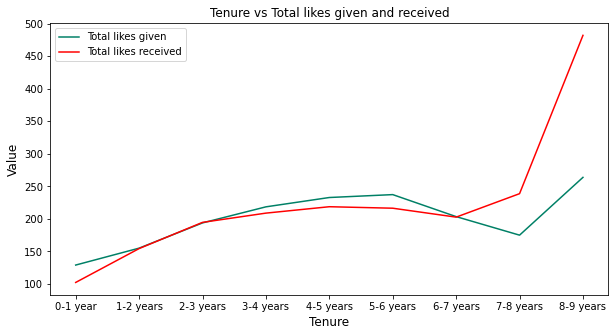

In [48]:
facebook_dfc.groupby(['tenure_group'])['likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['tenure_group'])['likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Tenure vs Total likes given and received', fontsize = 12)
plt.legend(['Total likes given', 'Total likes received'])

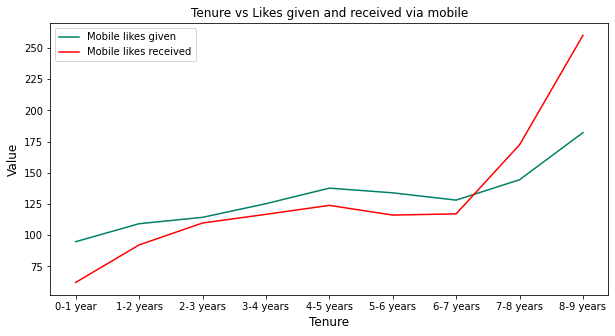

In [47]:
facebook_dfc.groupby(['tenure_group'])['mobile_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['tenure_group'])['mobile_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Tenure vs Likes given and received via mobile', fontsize = 12)
plt.legend(['Mobile likes given', 'Mobile likes received'])

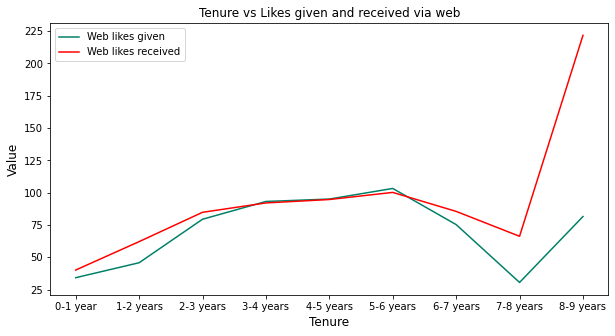

In [48]:
facebook_dfc.groupby(['tenure_group'])['www_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['tenure_group'])['www_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Tenure vs Likes given and received via web', fontsize = 12)
plt.legend(['Web likes given', 'Web likes received'])

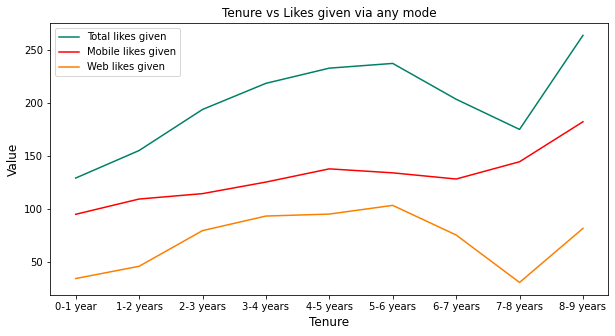

In [49]:
facebook_dfc.groupby(['tenure_group'])['likes'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['tenure_group'])['mobile_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
facebook_dfc.groupby(['tenure_group'])['www_likes'].mean().plot(kind='line', figsize = (10,5), cmap ='Wistia_r')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Tenure vs Likes given via any mode', fontsize = 12)
plt.legend(['Total likes given', 'Mobile likes given', 'Web likes given'])

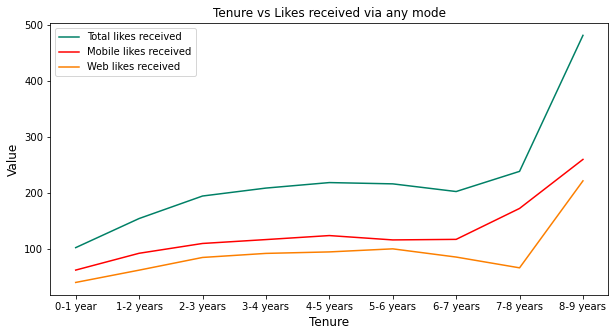

In [52]:
facebook_dfc.groupby(['tenure_group'])['likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='summer')
facebook_dfc.groupby(['tenure_group'])['mobile_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='autumn')
facebook_dfc.groupby(['tenure_group'])['www_likes_received'].mean().plot(kind='line', figsize = (10,5), cmap ='Wistia_r')
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title('Tenure vs Likes received via any mode', fontsize = 12)
plt.legend(['Total likes received', 'Mobile likes received', 'Web likes received'])

<a id=section70401></a>
**Obersvations**
- In the initial years, when you are new to facebook, you initiate less friendship requests and your total friend count is comparatively low as you are pretty new to the setup and you are still exploring. Doesn't matter what age you belong to or of which gender you are. As the tenure increases, your activity on facebook increases and hence your friend count also as you are now fully comfortable with the setup.
- In the initial years, you send out more likes than you receive it. Then comes a time, when both likes given and received by the user are exactly the same. Then between 3-6 years, when your activity on fb is average, there is no increase in your friend count also as such, then you give more likes than you receive it. 
- People are more inclined towards using mobile than web for using facebook. No matter how old or new they are on the platform, they prefer mobile over web for any kind of activity.

<a id=section705></a>
### 7.5 Analysis on the basis of Gender and Age combined

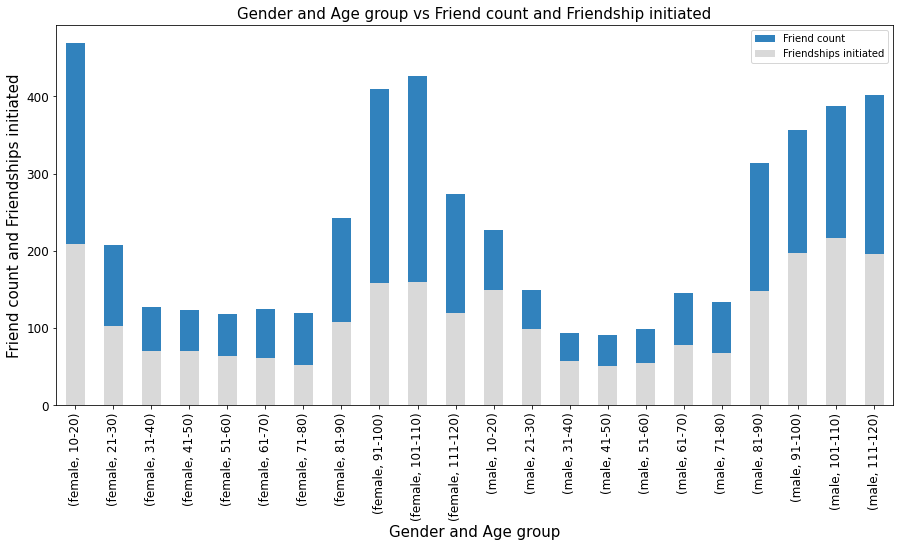

In [51]:
facebook_dfc.groupby(['gender','age_group'])['friend_count'].mean().plot(kind='bar',figsize = (15,7), 
                                                                         cmap='tab20c', fontsize = 12)
facebook_dfc.groupby(['gender','age_group'])['friendships_initiated'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='tab20c_r', fontsize = 12)

plt.xlabel('Gender and Age group', fontsize = 15)
plt.ylabel('Friend count and Friendships initiated', fontsize = 15)
plt.title('Gender and Age group vs Friend count and Friendship initiated', fontsize = 15)
plt.legend(labels=('Friend count', 'Friendships initiated'))

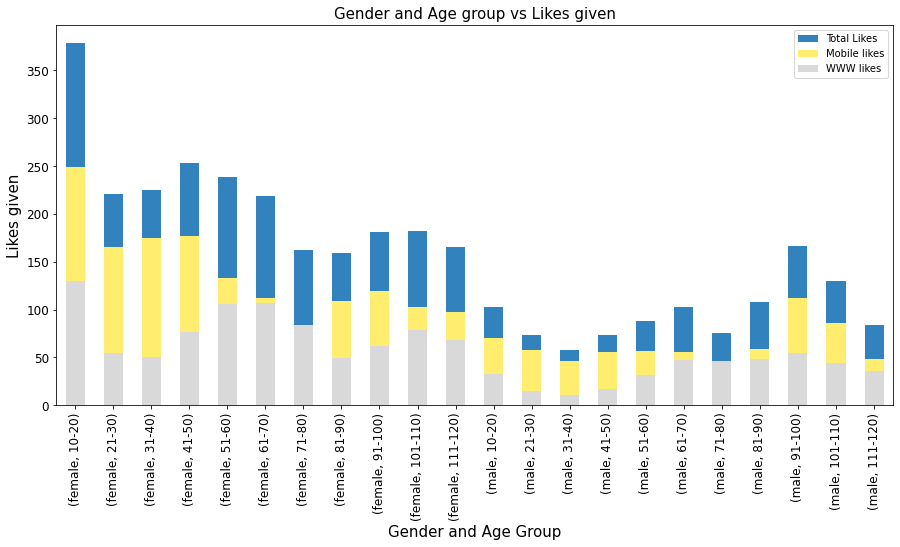

In [61]:
facebook_dfc.groupby(['gender','age_group'])['likes'].mean().plot(kind='bar',figsize = (15,7), 
                                                                         cmap='tab20c', fontsize = 12)
facebook_dfc.groupby(['gender','age_group'])['mobile_likes'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='Set3_r', fontsize = 12)
facebook_dfc.groupby(['gender','age_group'])['www_likes'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='tab20c_r', fontsize = 12)
plt.xlabel('Gender and Age Group', fontsize = 15)
plt.ylabel('Likes given', fontsize = 15)
plt.title('Gender and Age group vs Likes given', fontsize = 15)
plt.legend(labels=('Total Likes', 'Mobile likes', 'WWW likes'))

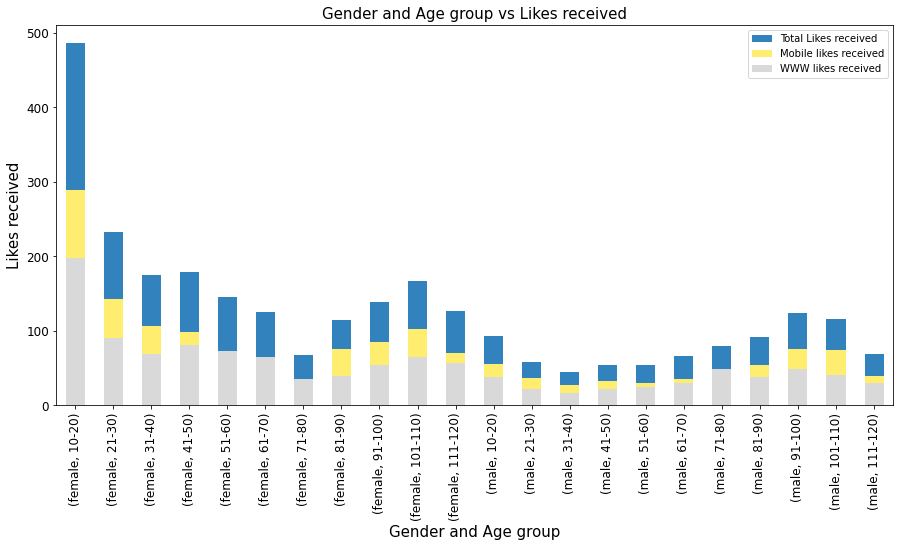

In [62]:
facebook_dfc.groupby(['gender','age_group'])['likes_received'].mean().plot(kind='bar',figsize = (15,7), 
                                                                         cmap='tab20c', fontsize = 12)
facebook_dfc.groupby(['gender','age_group'])['mobile_likes_received'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='Set3_r', fontsize = 12)
facebook_dfc.groupby(['gender','age_group'])['www_likes_received'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='tab20c_r', fontsize = 12)
plt.xlabel('Gender and Age group', fontsize = 15)
plt.ylabel('Likes received', fontsize = 15)
plt.title('Gender and Age group vs Likes received', fontsize = 15)
plt.legend(labels=('Total Likes received', 'Mobile likes received', 'WWW likes received'))

<a id=section70501></a>
**7.5.1 Observations**
- **Females, Age, Friend count and Friendships initiated**- <br>
Females who are in the age group of 10-20 have the highest friend count and friendship request initiated on an average. As their age increases, the total friend count and friend requests initiated decreases and gets flatten reaching the age 30. Then till the age 80, there is not much change in the friend count and friendships initiated but after age 80, there is sudden spike in both the requests initiated and the friend count.
- **Males, Age, Friend count and Friendships initiated** - <br>
As per this data, there is a very different observation w.r.t. to males and the activity in their age group. Here males who are in the age group of 81-90 have the highest friend count on an average. The next age group in line is 10-20 age group which have the highest friend count and friendships initiated. Similar to females, as their age increases, the total friend count and friend requests initiated decreases and gets flatten reaching the age 30. Then till the age 60, there is not much change in the friend count and friendships initiated but after age 60, there is sudden spike in both the requests initiated and the friend count.
- **Age, Gender and Giving Likes** - <br>
    - As previously observed as well, females of age group 10-20 and males of age group 10-20 and 61-70 give most likes. Similarly, if we talk about the lowest likes given, then for females it's the age group 81-90 and for males it's 31-40.
    - Between the age 10-50, people tend to use mobile more than web no matter the gender.
    - As the age increases after age 50, females start using web more than mobile and eventually by the age 70, they just use web.
    - Similar is the case with males also.
    - 71-80 age group uses only web whether male or female.
    - After age 80, suddenly female users start using mobile more than web whereas it's just the opposite in the case of males. They still stick to web more than mobile app.
- **Age, Gender and Receiving Likes** - <br>
    - Both males and females of age group 10-20 receive most likes and that too via web.
    - Lowest likes received for males is within age group 31-40. and for females this age group is 71-80.
    - In case of likes receiving, web is more dominant than mobile in any age group or gender.
    - Females after the age 50 use just web. Similar is the case with males also but after age 70.
    - 71-80 age group uses only web whether male or female.
    - Females suddenly after age 80, start using mobile more than web. Whereas this is not the case with males. Males also start using mobile after age 80 but not more than web.

<a id=section706></a>
### 7.6 Analysis on the basis of Gender and Tenure combined

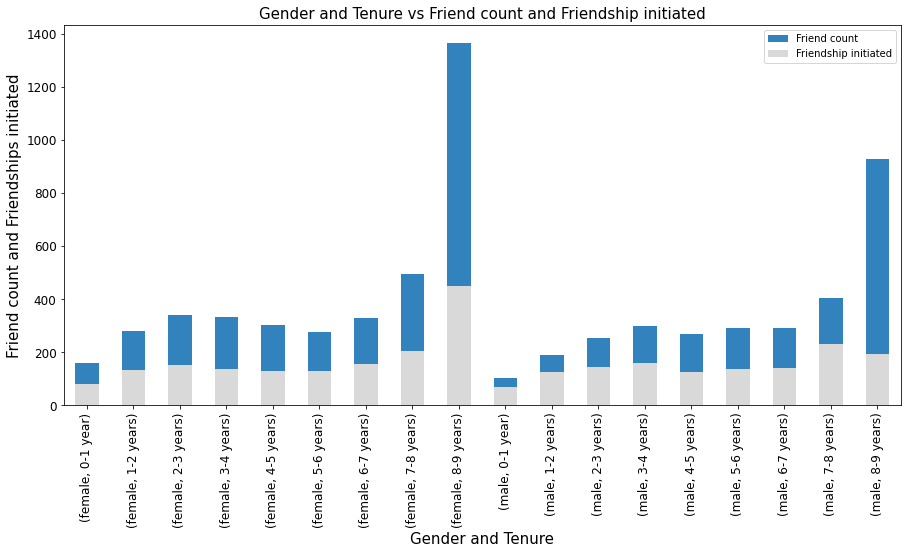

In [63]:
facebook_dfc.groupby(['gender','tenure_group'])['friend_count'].mean().plot(kind='bar',figsize = (15,7), 
                                                                         cmap='tab20c', fontsize = 12)
facebook_dfc.groupby(['gender','tenure_group'])['friendships_initiated'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='tab20c_r', fontsize = 12)

plt.xlabel('Gender and Tenure', fontsize = 15)
plt.ylabel('Friend count and Friendships initiated', fontsize = 15)
plt.title('Gender and Tenure vs Friend count and Friendship initiated', fontsize = 15)
plt.legend(labels=('Friend count', 'Friendship initiated'))

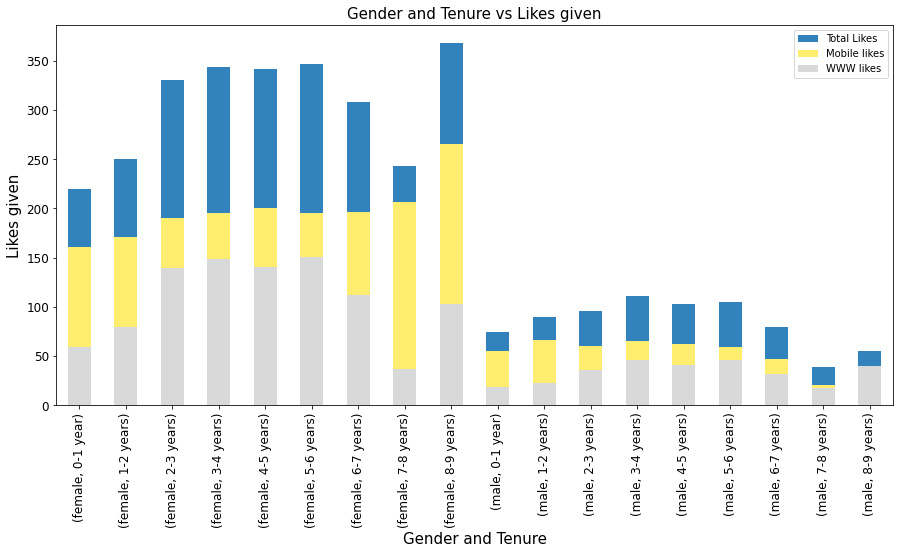

In [64]:
facebook_dfc.groupby(['gender','tenure_group'])['likes'].mean().plot(kind='bar',figsize = (15,7), 
                                                                         cmap='tab20c', fontsize = 12)
facebook_dfc.groupby(['gender','tenure_group'])['mobile_likes'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='Set3_r', fontsize = 12)
facebook_dfc.groupby(['gender','tenure_group'])['www_likes'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='tab20c_r', fontsize = 12)
plt.xlabel('Gender and Tenure', fontsize = 15)
plt.ylabel('Likes given', fontsize = 15)
plt.title('Gender and Tenure vs Likes given', fontsize = 15)
plt.legend(labels=('Total Likes', 'Mobile likes', 'WWW likes'))

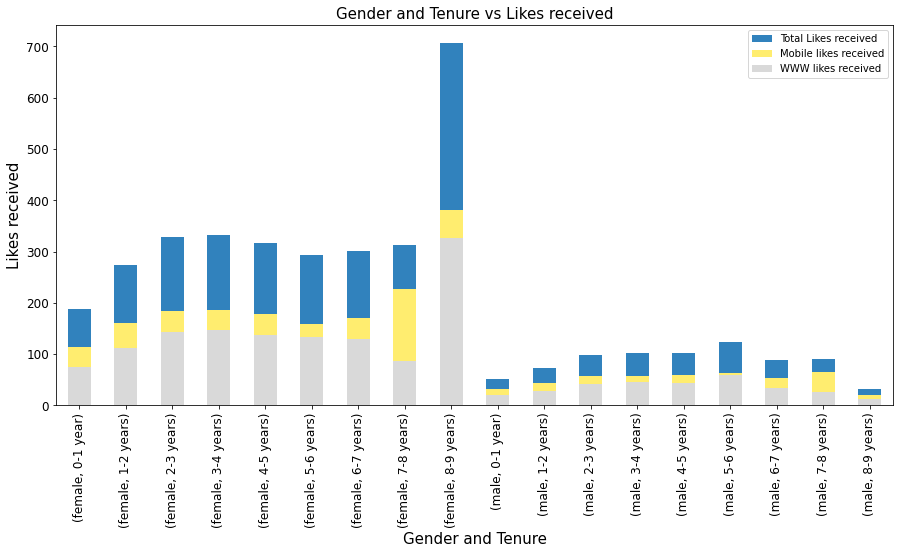

In [65]:
facebook_dfc.groupby(['gender','tenure_group'])['likes_received'].mean().plot(kind='bar',figsize = (15,7), 
                                                                         cmap='tab20c', fontsize = 12)
facebook_dfc.groupby(['gender','tenure_group'])['mobile_likes_received'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='Set3_r', fontsize = 12)
facebook_dfc.groupby(['gender','tenure_group'])['www_likes_received'].mean().plot(kind='bar',figsize = (15,7), 
                                                                                  cmap='tab20c_r', fontsize = 12)
plt.xlabel('Gender and Tenure', fontsize = 15)
plt.ylabel('Likes received', fontsize = 15)
plt.title('Gender and Tenure vs Likes received', fontsize = 15)
plt.legend(labels=('Total Likes received', 'Mobile likes received', 'WWW likes received'))

<a id=section70601></a>
**7.6.1 Observations**
- **Gender, Tenure, Friend count and Friendships initiated**- <br>
As observed earlier also, in the initial years, when you are new to facebook, you initiate less friendship requests and your total friend count is comparatively low as you are pretty new to the setup and you are still exploring. Doesn't matter what gender you belong to. As the tenure increases, your friend count also increases as now you are fully comfortable with the setup. Hence, your activity on facebook is also more.
- **Gender, Tenure and Giving Likes** - <br>
    - Firstly on an average, the basic activity of giving likes is way too high in females than males, no matter what the tenure is. 
    - For both males and females, overall there is not much change in their activity of giving likes whatever their tenure is. In the initial 2 years, it's obviously less but after that, it flattens out for almost 5 years. After a total of 7 years on facebook, there is sudden decline in the activity for an year but immediately after that, it again spikes up. 
    - Now when females join facebook, they use mobile app more than web and this happens for first 2 years. But as their tenure increases, they start using web more than mobile for their activities. This again happens for almost 5 years. After 7 years, they again start using mobile more than web for their activities.
    - Similar to females, when males also join facebook, they use mobile app more than web and this happens for first 2 years. And as their tenure increases, they start using web more than mobile for their activities. Unlike females, finally after 8 years, they are just using web and no mobile app at all for giving likes.
- **Gender, Tenure and Receiving Likes** - <br>
    - Again on an average, females receive likes way more than males, no matter what the tenure is. 
    - For females, for first 8 years, there is not much deviation in the likes received by them. But after 8 years, there is sudden spike in the likes received by them.
    - Similar to females, in the case of males also, there is not much deviation in the likes received by them. But unlike females, after 8 years, there is sudden decline in the overall likes received by them.
    - For almost 7 years, females receive more likes via web than mobile app. Then suddenly for an year after 7 years, they start receiving more likes via mobile than web. But this happens just for 1 year. After that years, again females start receiving more likes via web than mobile.
    - Similar to females, for almost 6 years, males receive more likes via web than mobile app. Then after 6 years, we can see a shift from web to mobile for 2 years. After 8 years on facebook, for males, there is no difference in the likes received by them via any mode. They start receiving equal no. of likes from both web and mobile.

<a id=section707></a>
### 7.7 Analysis on Dormant users

<a id=section70701></a>
### 7.7.1 Users with 0 Friend count and 0 Friendships initiated

In [66]:
fc0 = facebook_dfc[facebook_dfc.friend_count == 0]
fc0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,1395843,90,4,1923,7,male,0.0,0,0,95,78,95,56,0,22,81-90,0-1 year
1958,1306409,23,24,1990,1,male,48.0,0,0,164,0,164,0,0,0,21-30,0-1 year
1959,1838179,18,29,1995,10,female,0.0,0,0,246,100,0,9,246,91,10-20,0-1 year
1960,1594192,63,1,1950,1,female,57.0,0,0,271,1,271,0,0,1,61-70,0-1 year


In [67]:
fi0 = fc0[fc0.friendships_initiated == 0]
fi0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,1395843,90,4,1923,7,male,0.0,0,0,95,78,95,56,0,22,81-90,0-1 year
1958,1306409,23,24,1990,1,male,48.0,0,0,164,0,164,0,0,0,21-30,0-1 year
1959,1838179,18,29,1995,10,female,0.0,0,0,246,100,0,9,246,91,10-20,0-1 year
1960,1594192,63,1,1950,1,female,57.0,0,0,271,1,271,0,0,1,61-70,0-1 year


In [68]:
fi0['gender'].value_counts()

male      1459
female     503
Name: gender, dtype: int64

Text(0.5, 1.0, '% of males and females with 0 friend count and 0 friendship initiated')

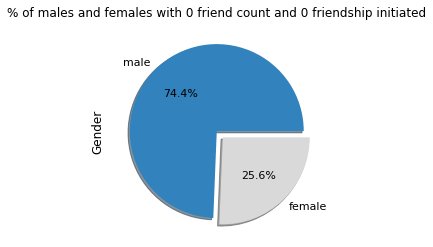

In [70]:
fi0['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, fontsize = 11, cmap = 'tab20c')
plt.ylabel('Gender', fontsize = 12)
plt.title('% of males and females with 0 friend count and 0 friendship initiated',
          fontsize = 12)

In [71]:
fi0.groupby(['age_group'])['age_group'].count()

age_group
10-20      391
21-30      745
31-40      381
41-50      205
51-60      138
61-70       66
71-80       21
81-90        5
91-100       6
101-110      4
111-120      0
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age group of users with 0 friend count and 0 friendship initiated')

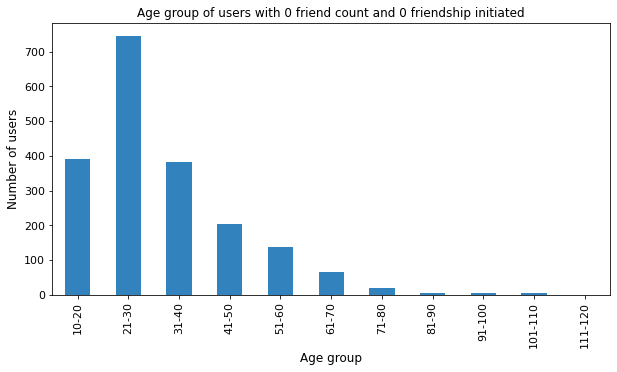

In [72]:
fi0.groupby(['age_group'])['age_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Age group of users with 0 friend count and 0 friendship initiated', fontsize = 12)

In [67]:
fi0.groupby(['tenure_group'])['tenure_group'].count()

tenure_group
0-1 year     1468
1-2 years     408
2-3 years      61
3-4 years      20
4-5 years       3
5-6 years       2
6-7 years       0
7-8 years       0
8-9 years       0
Name: tenure_group, dtype: int64

Text(0.5, 1.0, 'Tenure of users with 0 friend count and 0 friendship initiated')

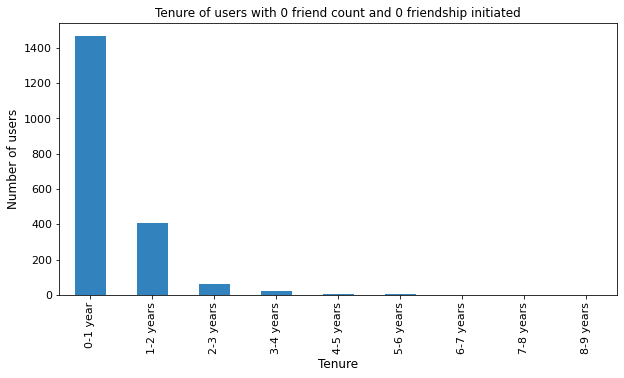

In [73]:
fi0.groupby(['tenure_group'])['tenure_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Tenure of users with 0 friend count and 0 friendship initiated', fontsize = 12)

In [69]:
fi0.groupby(['gender'])['likes'].agg(['sum','mean','count','max','min'])

,sum,mean,count,max,min
gender,,,,,
female,2325,4.622266,503,848,0
male,1497,1.026045,1459,164,0


Text(0.5, 1.0, 'Average number of likes given by males and females with 0 friend count and 0 friendship initiated')

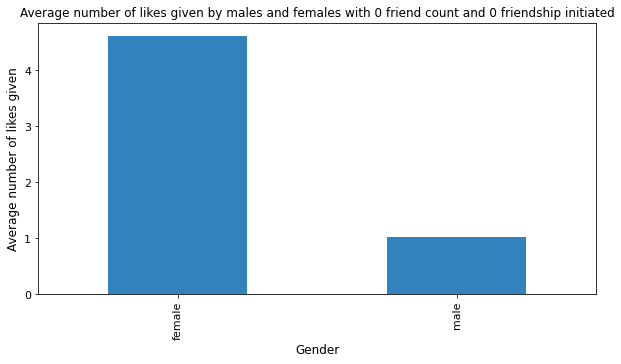

In [74]:
fi0.groupby(['gender'])['likes'].mean().plot(kind='bar', fontsize=11, figsize=(10,5), cmap = 'tab20c')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Average number of likes given', fontsize = 12)
plt.title('Average number of likes given by males and females with 0 friend count and 0 friendship initiated', fontsize = 12)

In [71]:
fi0.groupby(['gender'])['likes_received'].agg(['sum','mean', 'count','max','min'])

,sum,mean,count,max,min
gender,,,,,
female,602,1.196819,503,100,0
male,576,0.394791,1459,78,0


Text(0.5, 1.0, 'Average number of likes received by males and females with 0 friend count and 0 friendship initiated')

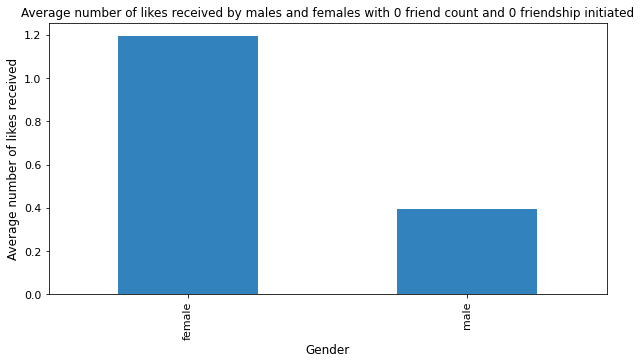

In [75]:
fi0.groupby(['gender'])['likes_received'].mean().plot(kind='bar', fontsize=11, figsize=(10,5), cmap = 'tab20c')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Average number of likes received', fontsize = 12)
plt.title('Average number of likes received by males and females with 0 friend count and 0 friendship initiated', fontsize = 12)

**Observations**
- There are total of 1962 users who have 0 friend count and they have initiated 0 friend request.
- Out of this number, 74% of them are males and only 26% are females.
- This kind of behaviour is more seen in the age group of 21-30. 
- Most of the users have just joined facebook. Not much time has passed since they first signed themselves up on facebook.
- Though these users have no friends, but still we can see some kind of activity in their accounts. They like someone else's post and also receive likes on their posts. Though this number is not much (not considering the outliers) but on an average, if we talk about females, they give 4 likes and receive 1 like. Whereas if we talk about males, on an average, they usually give 1 like and they getting like from someone is close to 0. 
- At the same time, in the case of females, they are few users also who give 848 likes and receive close to 100 likes but these users are very less in number.
- Similar to the above point, if we consider males, then also there are few users who have given 164 likes and received 78 likes but again these users are very less in number.

<a id=section70702></a>
### 7.7.2 Users who are completely dormant with no activity whatsoever

In [76]:
likes0 = fi0[fi0.likes == 0]
likes0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2057826,95,1,1918,1,male,364.0,0,0,0,0,0,0,0,0,91-100,0-1 year
1693,1942772,97,15,1916,11,male,613.0,0,0,0,0,0,0,0,0,91-100,1-2 years
1694,1226208,100,1,1913,12,female,171.0,0,0,0,0,0,0,0,0,91-100,0-1 year
1695,2192316,107,22,1906,5,male,242.0,0,0,0,0,0,0,0,0,101-110,0-1 year


In [77]:
lr0 = likes0[likes0.likes_received == 0]
lr0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2057826,95,1,1918,1,male,364.0,0,0,0,0,0,0,0,0,91-100,0-1 year
1693,1942772,97,15,1916,11,male,613.0,0,0,0,0,0,0,0,0,91-100,1-2 years
1694,1226208,100,1,1913,12,female,171.0,0,0,0,0,0,0,0,0,91-100,0-1 year
1695,2192316,107,22,1906,5,male,242.0,0,0,0,0,0,0,0,0,101-110,0-1 year


In [78]:
lr0['gender'].value_counts()

male      1247
female     417
Name: gender, dtype: int64

Text(0.5, 1.0, '% of males and females who are completely dormant')

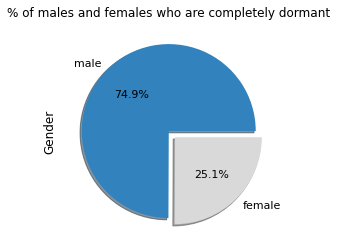

In [79]:
lr0['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, fontsize = 11, cmap = 'tab20c')
plt.ylabel('Gender', fontsize = 12)
plt.title('% of males and females who are completely dormant', fontsize = 12)         

In [53]:
lr0.groupby(['age_group'])['age_group'].count()

age_group
10-20      337
21-30      630
31-40      328
41-50      177
51-60      112
61-70       54
71-80       16
81-90        3
91-100       5
101-110      2
111-120      0
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age group of dormant users')

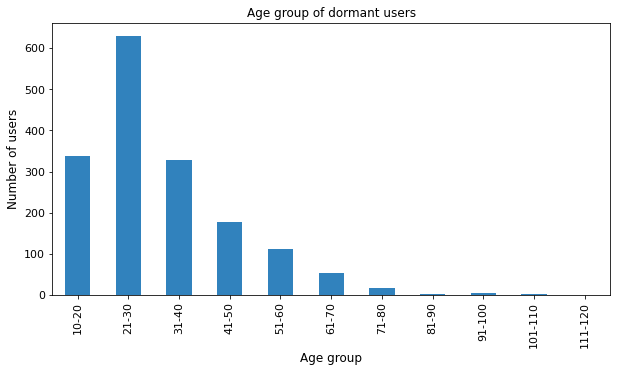

In [80]:
lr0.groupby(['age_group'])['age_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Age group of dormant users', fontsize = 12)

In [55]:
lr0.groupby(['tenure_group'])['tenure_group'].count()

tenure_group
0-1 year     1215
1-2 years     372
2-3 years      57
3-4 years      15
4-5 years       3
5-6 years       2
6-7 years       0
7-8 years       0
8-9 years       0
Name: tenure_group, dtype: int64

Text(0.5, 1.0, 'Tenure of dormant users')

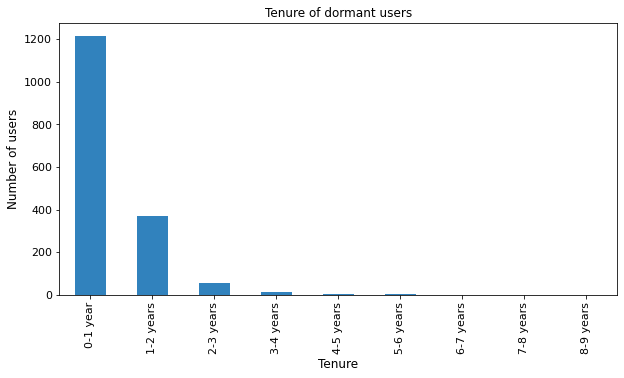

In [81]:
lr0.groupby(['tenure_group'])['tenure_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Tenure of dormant users', fontsize = 12)

**Observations**
- There are total of 1664 users who are completely dormant. They don't have any friends. They have no initiated any friend requests. Neither have they liked someone else's post nor someone else has liked any of their posts if any.
- 75% of such userbase consists of males whereas just 25% of them are females.
- Again such behaviour can be seen in the age group of 21-30 and these users are again very new to facebook with their tenure on facebook being in the range of 0-1 year.

<a id=section70703></a>
### 7.7.3 Users with friends but no likes activity at all

In [82]:
Likes0 = facebook_dfc[facebook_dfc.likes == 0]
Likes0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98029,1792910,86,6,1927,9,male,610.0,4759,994,0,8,0,7,0,1,81-90,1-2 years
98030,1267270,98,29,1915,12,female,1293.0,3483,386,0,8,0,5,0,3,91-100,3-4 years
98031,1978609,103,4,1910,3,female,636.0,2129,640,0,2,0,2,0,0,101-110,1-2 years
98032,1130147,103,1,1910,4,male,1210.0,1965,856,0,4,0,2,0,2,101-110,3-4 years


In [83]:
Likesreceived0 = Likes0[Likes0.likes_received == 0]
Likesreceived0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97046,1729412,56,6,1957,2,male,802.0,1445,1010,0,0,0,0,0,0,51-60,2-3 years
97049,1839690,103,13,1910,12,female,703.0,1338,541,0,0,0,0,0,0,101-110,1-2 years
97050,2098825,108,27,1905,11,male,1179.0,1778,764,0,0,0,0,0,0,101-110,3-4 years
98005,1883270,18,14,1995,11,female,341.0,2050,467,0,0,0,0,0,0,10-20,0-1 year


In [84]:
Likesreceived0['gender'].value_counts()

male      11542
female     3916
Name: gender, dtype: int64

Text(0.5, 1.0, '% of males and females with 0 likes activity')

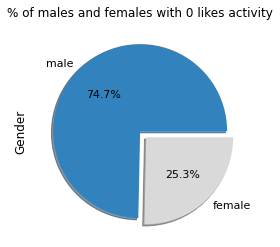

In [85]:
Likesreceived0['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, fontsize = 11, 
                                                 cmap = 'tab20c')
plt.ylabel('Gender', fontsize = 12)
plt.title('% of males and females with 0 likes activity', fontsize = 12)         

In [86]:
Likesreceived0.groupby(['age_group'])['age_group'].count()

age_group
10-20      3547
21-30      5293
31-40      2365
41-50      1476
51-60      1147
61-70       932
71-80       338
81-90        88
91-100       65
101-110     194
111-120      13
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age group of users with 0 likes activity')

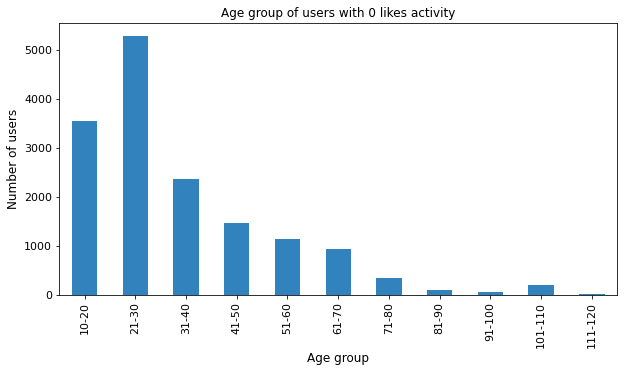

In [87]:
Likesreceived0.groupby(['age_group'])['age_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Age group of users with 0 likes activity', fontsize = 12)

In [88]:
Likesreceived0.groupby(['tenure_group'])['tenure_group'].count()

tenure_group
0-1 year     8176
1-2 years    5158
2-3 years    1207
3-4 years     512
4-5 years     299
5-6 years      77
6-7 years      29
7-8 years       0
8-9 years       0
Name: tenure_group, dtype: int64

Text(0.5, 1.0, 'Tenure of users with 0 likes activity')

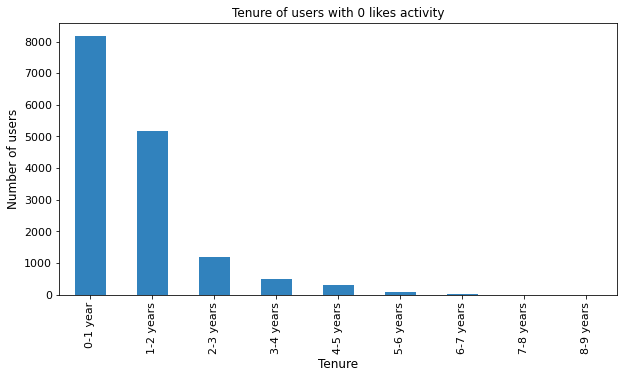

In [89]:
Likesreceived0.groupby(['tenure_group'])['tenure_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, 
                                                                      figsize = (10,5))
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Tenure of users with 0 likes activity', fontsize = 12)

In [90]:
Likesreceived0.groupby(['gender'])['friend_count'].agg(['sum','mean', 'count','max','min'])

,sum,mean,count,max,min
gender,,,,,
female,205982,52.600102,3916,2050,0
male,646439,56.007538,11542,1954,0


Text(0.5, 1.0, 'Friend count of users with 0 likes activity')

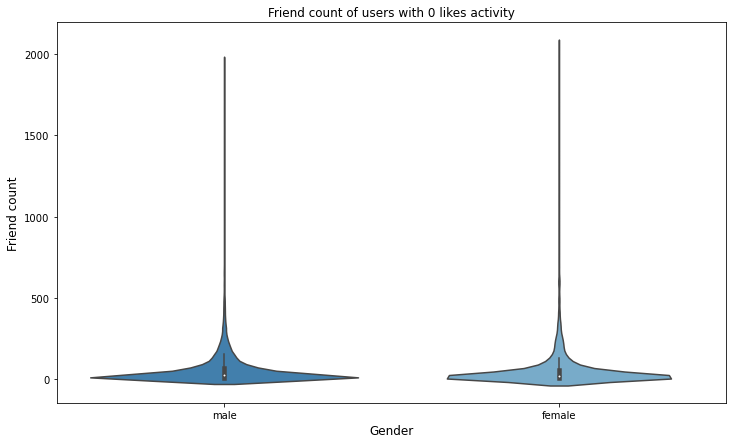

In [91]:
plt.figure(figsize=(12,7))
sns.violinplot(data=Likesreceived0, x='gender', y='friend_count', palette='tab20c', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Friend count', fontsize = 12)
plt.title('Friend count of users with 0 likes activity')

In [92]:
Likesreceived0.groupby(['gender'])['friendships_initiated'].agg(['sum','mean', 'count','max','min'])

,sum,mean,count,max,min
gender,,,,,
female,110075,28.109040,3916,1140,0
male,429880,37.244845,11542,1498,0


Text(0.5, 1.0, 'Friendship initiated by users with 0 likes activity')

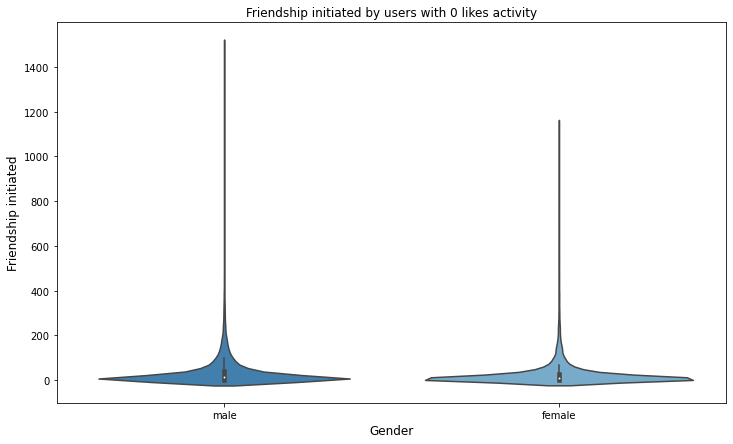

In [93]:
plt.figure(figsize=(12,7))
sns.violinplot(data=Likesreceived0, x='gender', y='friendships_initiated', palette='tab20c', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Friendship initiated', fontsize = 12)
plt.title('Friendship initiated by users with 0 likes activity')

**Observations**
- There are a total of 15458 users who do not like or receive like on any of the posts.
- Out of this, 75% are males and 25% are females.
- Again such behaviour is more prevelant in the age group of 21-30 and these users are again very new to facebook with their tenure on facebook being in the range of 0-1 year.
- It's not like they don't have friends, they do, but majority of the userbase has close to 0-5 friends with few users being the outliers having close to 2000 friends.
- Similarly, It's not like they haven't initiated any friend requests, they have, but majority of the userbase has just initiated 0-5 requests with few users again being the outliers initiating close to 1200-1400 friend requests.

<a id=section70704></a>
### 7.7.4 Users who do not use web at all

In [94]:
web0 = facebook_dfc[facebook_dfc.www_likes == 0]
web0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98914,1218476,21,7,1992,1,female,407.0,2553,1767,2415,5345,2415,4461,0,884,21-30,1-2 years
98915,2051379,44,4,1969,6,female,1385.0,2066,41,2951,14625,2951,7869,0,6756,41-50,3-4 years
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,10-20,0-1 year
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,21-30,1-2 years


In [95]:
webreceived0 = web0[web0.www_likes_received == 0]
webreceived0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98079,1406197,102,25,1911,12,male,1085.0,2560,1525,5,2,5,2,0,0,101-110,2-3 years
98081,2022131,16,14,1997,8,male,743.0,2294,1157,6,0,6,0,0,0,10-20,2-3 years
98082,1867596,41,14,1972,3,male,412.0,1936,1488,6,0,6,0,0,0,41-50,1-2 years
98185,1479326,68,17,1945,8,male,1555.0,2102,867,37,19,37,19,0,0,61-70,4-5 years


In [96]:
webreceived0['gender'].value_counts()

male      23242
female     8499
Name: gender, dtype: int64

Text(0.5, 1.0, '% of males and females who do not use web at all')

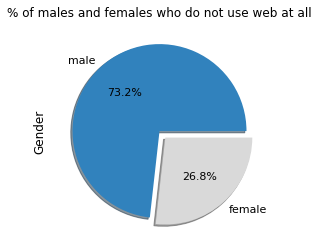

In [97]:
webreceived0['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, fontsize = 11, 
                                               cmap = 'tab20c')
plt.ylabel('Gender', fontsize = 12)
plt.title('% of males and females who do not use web at all', fontsize = 12)         #male = 1459, female = 503

In [105]:
webreceived0.groupby(['age_group'])['age_group'].count()

age_group
10-20       7669
21-30      11011
31-40       4794
41-50       2793
51-60       2234
61-70       1668
71-80        538
81-90        163
91-100       215
101-110      629
111-120       27
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age group of users who do not use web at all')

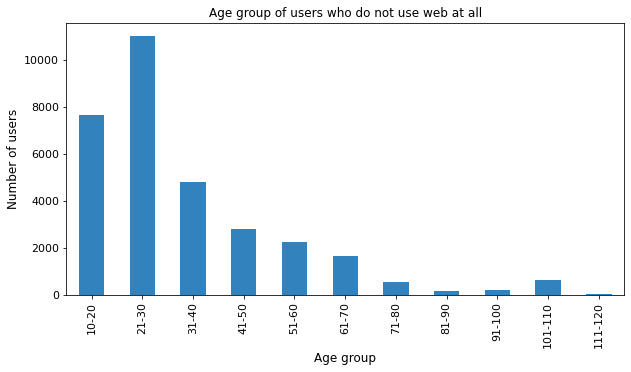

In [98]:
webreceived0.groupby(['age_group'])['age_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Age group of users who do not use web at all', fontsize = 12)

In [107]:
webreceived0.groupby(['tenure_group'])['tenure_group'].count()

tenure_group
0-1 year     16606
1-2 years    10625
2-3 years     2586
3-4 years     1043
4-5 years      667
5-6 years      158
6-7 years       56
7-8 years        0
8-9 years        0
Name: tenure_group, dtype: int64

Text(0.5, 1.0, 'Tenure of users who do not use web at all')

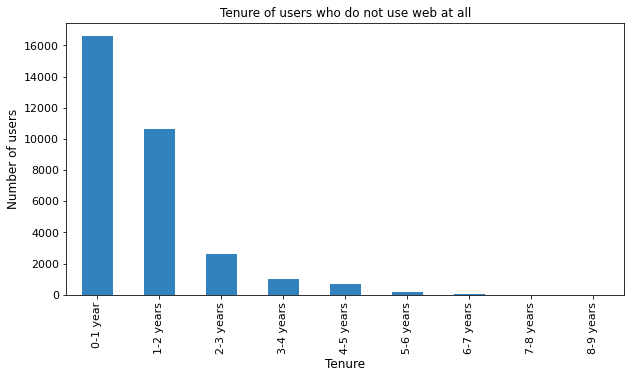

In [99]:
webreceived0.groupby(['tenure_group'])['tenure_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Tenure of users who do not use web at all', fontsize = 12)

**Observations**
- There are a total of 31741 users who do not use web at all.
- Out of this, 73% are males and 27% are females.
- Again such behaviour is more prevelant in the age group of 21-30 and these users are again very new to facebook with their tenure on facebook being in the range of 0-1 year.
- This means males are more prone to using mobile than web.

<a id=section70705></a>
### 7.7.5 Users who do not use mobile at all

In [100]:
mobile0 = facebook_dfc[facebook_dfc.mobile_likes == 0]
mobile0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98590,2004909,58,16,1955,6,female,579.0,2119,994,699,345,0,62,699,283,51-60,1-2 years
98591,1641850,112,1,1901,1,male,1165.0,4310,543,664,227,0,52,664,175,111-120,3-4 years
98740,1333327,103,29,1910,8,male,1024.0,2236,1632,1296,220,0,70,1296,150,101-110,2-3 years
98870,1900164,23,20,1990,6,male,1026.0,2352,790,3228,4077,0,1657,3228,2420,21-30,2-3 years


In [101]:
mobilereceived0 = mobile0[mobile0.mobile_likes_received == 0]
mobilereceived0

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98016,1993020,21,8,1992,1,male,1262.0,1954,1050,0,0,0,0,0,0,21-30,3-4 years
98019,1564560,23,21,1990,5,male,1200.0,2211,1804,0,1,0,0,0,1,21-30,3-4 years
98047,1876432,18,24,1995,4,female,434.0,4587,874,2,1,0,0,2,1,10-20,1-2 years
98061,1680023,17,13,1996,10,female,736.0,2415,1795,3,0,0,0,3,0,10-20,2-3 years


In [102]:
mobilereceived0['gender'].value_counts()

male      15810
female     5593
Name: gender, dtype: int64

Text(0.5, 1.0, '% of males and females who do not use mobile at all')

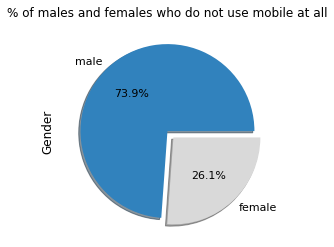

In [103]:
mobilereceived0['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, fontsize = 11, 
                                               cmap = 'tab20c')
plt.ylabel('Gender', fontsize = 12)
plt.title('% of males and females who do not use mobile at all', fontsize = 12)         #male = 1459, female = 503

In [119]:
mobilereceived0.groupby(['age_group'])['age_group'].count()

age_group
10-20      5006
21-30      6821
31-40      3096
41-50      1987
51-60      1798
61-70      1484
71-80       561
81-90       166
91-100      106
101-110     352
111-120      26
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age group of users who do not use mobile at all')

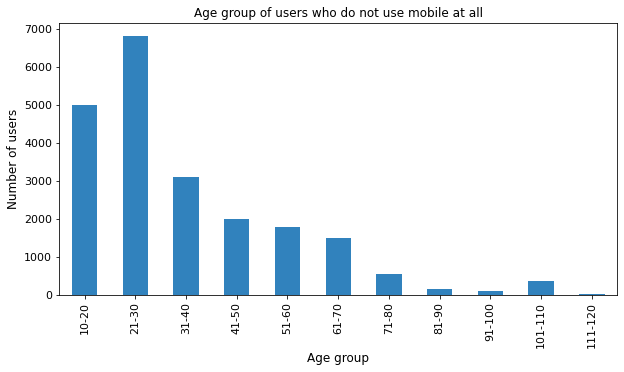

In [104]:
mobilereceived0.groupby(['age_group'])['age_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Age group', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Age group of users who do not use mobile at all', fontsize = 12)

In [121]:
mobilereceived0.groupby(['tenure_group'])['tenure_group'].count()

tenure_group
0-1 year     10885
1-2 years     7221
2-3 years     1802
3-4 years      800
4-5 years      512
5-6 years      143
6-7 years       40
7-8 years        0
8-9 years        0
Name: tenure_group, dtype: int64

Text(0.5, 1.0, 'Tenure of users who do not use mobile at all')

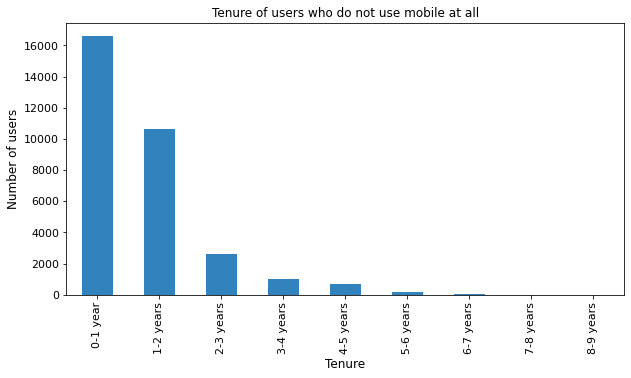

In [105]:
webreceived0.groupby(['tenure_group'])['tenure_group'].count().plot(kind='bar', cmap='tab20c', fontsize = 11, figsize = (10,5))
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Number of users', fontsize = 12)
plt.title('Tenure of users who do not use mobile at all', fontsize = 12)

**Observations**
- There are a total of 21403 users who do not use mobile at all.
- Out of this, 74% are males and 26% are females.
- Again such behaviour is more prevelant in the age group of 21-30 and these users are again very new to facebook with their tenure on facebook being in the range of 0-1 year.

<a id=section708></a>
### 7.8 Overall usage of mobile app and web

In [25]:
facebook_dfc.groupby(['gender'])['mobile_likes', 'mobile_likes_received','www_likes','www_likes_received'].sum()

,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,
female,6960437,5921399,3507665,4199879
male,3545395,2406782,1438765,1598611


In [27]:
facebook_dfc.groupby(['age_group'])['mobile_likes', 'mobile_likes_received','www_likes','www_likes_received'].sum()

,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age_group,,,,
10-20,3470268,3633281,1751415,2477427
21-30,2717813,2077000,819617,1285829
31-40,1182134,715431,319863,448369
41-50,975114,550442,386577,424789
51-60,903653,489536,659170,462641
61-70,587583,335673,538836,331164
71-80,125767,72237,150202,91932
81-90,67624,51832,40012,31696
91-100,140079,96658,70138,61809


**Observations**
- Overall the usage of mobile app is more than web, no matter what the gender is.
- Between the age group 10-20, the usage of both mobile app and web is maximum and within the age group 81-90, it is the minimum with both mobile and web.
- 71-80 is that age group where web users are more than the mobile app users.

<a id=section8></a>
## 8. Conclusion

**Age** 
- Minimum age is absolutely okay as it meets the facebook eligibility criteria. But the maximum age in the dataset is 113 which is quite unusual. We can see that the numbers of users fade with the increase in age but at the same time we can also see a sudden spike in the userbase after age 92. We can't fully term this as incorrect data as there must be for sure few users above the age 92 but 4000 people above this age is leading to outliers. Maximum userbase is within the age group 18-25.
- On an average, Between age 10-20, there is maximum activity in terms of initiating friend request, the total friend count, giving/receiving likes, etc. But as the age increases, all the activity starts decreasing.
- Users within the age group 10-70 use mobile more than web for giving likes. High age group users are more comfortable with using web for giving likes.
- Also the users within the age group 10-60 receive more likes via mobile than web. There is a slight intersection at the age 70, where there is no difference between the mode used. It's just between age 70-80, where users are getting more likes via web. Again after age 80, we can see a spike in the like received via mobile app.

**Gender**  
- Male users are around 60% of the entire data. Hence there are more male users than female users. 
- Age group 21-30 has maximum number of males and females. As the age increases, the total numbers of users in each age group decreases.
- Males remain active on facebook only for a short duration of time. In the long term, females remain more active on facebook than males.
- Inspite of males generating more friendship requests than females, both males and females have almost the same total friend count at the end.
- Females give more likes and receive more likes than males no matter the mode. 
- The top 10 users to get maximum likes are females and the top 10 users to receive the lowest are males.
- Both males and females are more inclined towards using mobile app initially at a very young age but as their age increases, they start using web more than mobile. Overall usage is still more via mobile app than web. 
- In case of receiving likes, web is more dominant than mobile in any age group or gender but if we talk specifically of the age group receiving most likes via web, it is age group 10-20.

**Tenure** 
- Our tenure is rightly skewed. 
- In the initial years, when you are new to facebook, you initiate less friendship requests and your total friend count is comparatively low as you are pretty new to the setup and you are still exploring. Doesn't matter what age you belong to or of which gender you are. As the tenure increases, your activity on facebook increases and hence your friend count also as you are now fully comfortable with the setup.
- In the initial years, you send out more likes than you receive it. Then comes a time, when both likes given and received by the user are exactly the same. Then between 3-6 years, when your activity on fb is average, there is no increase in your friend count also as such, then you give more likes than you receive it. 
- People are more inclined towards using mobile than web for using facebook. No matter how old or new they are on the platform, they prefer mobile over web for any kind of activity.

**Friend count and Friendship initiated** 
- Most of the users have 0-2 facebook friends and have initiated friendships in the range of 0-10.

**Dormant users**
- There are 1664 users (75% males and 25% females) who are completely dormant. They don't have any friends. They have not initiated any friend requests. Neither have they liked someone else's post nor someone else has liked any of their posts if any.
- Similarly there are users who have 0 friends but still we can see some kind of activity in their accounts. They like someone else's post and also receive likes on their posts. Though this number is not much (not considering the outliers) but still few users are there.
- There are a total of 15458 users (75% males and 25% females) who have friends but they haven't liked or received any likes on their posts.
- Such dormancy is more seen in the age group 21-30 and these users are again very new to facebook with their tenure on facebook being in the range of 0-1 year.

**Likes given/received**
- Total Likes given are less than total likes received.
- Most of the users are those who have given/received 0-1 likes.
- More Likes are given and received via mobile app than web. Overall also the usage of mobile app is more than web.
- Between the age group 10-20, the usage of both mobile app and web is maximum and within the age group 81-90, it is the minimum with both mobile and web.
- 71-80 is that age group where web users are more than the mobile app users.
- There are a total of 31741 users (73% are males and 27% females) who do not use web at all.
- There are a total of 21403 users (74% are males and 26% females) who do not use mobile at all.

**Correlation**
- There is good degree of correlation between age and tenure. Higher the age, higher the user has been on facebook.
- There is high degree of correlation between friendship initiated and friendship count. More the friendship initiated, more friends you have on facebook.

<a id=section9></a>
## 9. Actionable Insight

- In this particular data, there is a major issue of age. 113 being the highest and 4000 users in 90+ age group. It is not even ideal to drop this complete userbase as there must be some users in this particular age group and it would be important to understand how they are making use of this social networking platform. Hence **Geographical location** of the users become a very important piece of information. Moreover, people of every geography uses facebook in a different way basis their access, knowledge, social circle, etc.
- Another important piece of information should be **posts on which like has been given or received** as to whether this is a photo or a video or a status to understand the behavior as to what kind of posts are liked the most.
- Another important piece of information could have been the **frequency of the posts** made by the user as to what is the posting pattern basis different age,gender and tenure.
- Similarly, the frequency of the users coming online or the total **time spent on facebook** could have been another important aspect of analysis basis different gender, age group and tenure.
- Data on other activities like **unfriending/blocking** to understand which gender or age group does more of such activities.
- Also, it is important to know this data is as on which date and also the **date of joining** of all the users to understand how users behave in each year of their tenure. What we have is the overall tenure and not the segments to it.